<a href="https://colab.research.google.com/github/wakandaforever69/MACHINE-LEARNING-PROJECT-1/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as skew
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA EXPLORATION**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv("/content/Gurgaon_RealEstate.csv")
dataset=df.copy()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Gurgaon_RealEstate.csv'

In [ ]:
dataset.describe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [ ]:
dataset.count()

property_type          3803
society                3802
sector                 3803
price                  3785
price_per_sqft         3785
area                   3785
areaWithType           3803
bedRoom                3803
bathroom               3803
balcony                3803
floorNum               3784
facing                 2698
agePossession          3803
super_built_up_area    1915
built_up_area          1733
carpet_area            1944
study room             3803
servant room           3803
store room             3803
pooja room             3803
others                 3803
furnishing_type        3803
luxury_score           3803
dtype: int64

In [ ]:
dataset.shape

(3803, 23)

In [ ]:
dataset.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## dropping duplicates

In [ ]:
dataset[dataset.duplicated()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
72,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
357,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,...,NaN,1239.0,1100.0,0,0,0,0,0,0,0
502,flat,central park flower valley,sector 33,1.40,21538.0,650.0,Super Built up area 650(60.39 sq.m.),3,3,3,...,650.0,NaN,NaN,0,0,0,0,0,0,54
528,flat,essel towers,sector 14,2.20,12500.0,1760.0,Carpet area: 1760 (163.51 sq.m.),3,4,3+,...,NaN,NaN,1760.0,0,0,0,0,0,0,0
580,flat,signature global city 63a,sector 63a,1.65,15263.0,1081.0,Super Built up area 1081(100.43 sq.m.),2,2,2,...,1081.0,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,flat,siddhartha apartment,sector 95,1.10,4327.0,2542.0,Carpet area: 2542 (236.16 sq.m.),4,3,3,...,NaN,NaN,2542.0,0,1,0,0,1,0,22
3754,flat,sare petioles,sector 92,1.30,6373.0,2040.0,Built Up area: 2040 (189.52 sq.m.),4,4,0,...,NaN,2040.0,NaN,0,0,0,0,0,0,0
3755,flat,vatika sovereign park,sector 99,3.25,9672.0,3360.0,Super Built up area 3360(312.15 sq.m.),4,4,3+,...,3360.0,NaN,NaN,0,1,0,0,0,0,123
3767,flat,ss the leaf,sector 85,1.93,8075.0,2390.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,...,2408.0,2400.0,2390.0,0,1,0,0,0,0,174


In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset.shape

(3677, 23)

## Missing values in Dataset

In [ ]:
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1987
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


## Numerical Columns

In [ ]:
numerical_coulumns = dataset.select_dtypes(include='number')
numerical_coulumns

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0.82,7585.0,1081.0,3,2,2.0,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,0.95,8600.0,1105.0,2,2,4.0,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.46,79.0,58228.0,2,2,0.0,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,0.32,5470.0,585.0,2,2,17.0,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,1.60,8020.0,1995.0,3,4,10.0,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,0.37,6346.0,583.0,2,2,5.0,583.0,NaN,483.0,0,0,0,0,0,0,73
3799,6.00,9634.0,6228.0,5,5,2.0,NaN,6228.0,NaN,1,1,1,1,0,0,160
3800,0.60,8163.0,735.0,1,1,5.0,735.0,NaN,NaN,0,0,0,0,0,1,67
3801,15.50,28233.0,5490.0,5,6,3.0,NaN,5490.0,NaN,1,1,1,1,0,0,76


## Finding Outliers

### Z-SCORE

In [ ]:
z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=np.number)))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

z_scores

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,NaN,NaN,NaN,0.189776,0.731353,NaN,NaN,NaN,NaN,0.487046,0.751896,0.318163,0.465990,0.35182,0.674527,1.197185
1,NaN,NaN,NaN,0.716821,0.731353,NaN,NaN,NaN,NaN,2.053193,1.329972,0.318163,0.465990,0.35182,0.674527,0.631701
2,NaN,NaN,NaN,0.716821,0.731353,NaN,NaN,NaN,NaN,0.487046,0.751896,0.318163,0.465990,0.35182,0.674527,1.065239
3,NaN,NaN,NaN,0.716821,0.731353,NaN,NaN,NaN,NaN,0.487046,0.751896,0.318163,0.465990,0.35182,0.674527,0.424357
4,NaN,NaN,NaN,0.189776,0.295445,NaN,NaN,NaN,NaN,0.487046,1.329972,0.318163,0.465990,2.84236,1.009272,1.931828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,0.716821,0.731353,NaN,NaN,NaN,NaN,0.487046,0.751896,0.318163,0.465990,0.35182,0.674527,0.028031
3799,NaN,NaN,NaN,0.864314,0.808844,NaN,NaN,NaN,NaN,2.053193,1.329972,3.143040,2.145969,0.35182,0.674527,1.667935
3800,NaN,NaN,NaN,1.243867,1.244751,NaN,NaN,NaN,NaN,0.487046,0.751896,0.318163,0.465990,0.35182,1.009272,0.085066
3801,NaN,NaN,NaN,0.864314,1.322243,NaN,NaN,NaN,NaN,2.053193,1.329972,3.143040,2.145969,0.35182,0.674527,0.084579


### IQR

In [ ]:
Q1 = dataset.select_dtypes(include=np.number).quantile(0.25)
Q3 = dataset.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
outlier_indices = dataset[(dataset.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (dataset.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))]
outlier_indices.iloc[:, :23].describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,425.000000,354.000000,216.000000,143.000000,126.000000,81.000000,89.000000,127.000000,78.000000,705.0,0.0,338.0,656.0,405.0,0.0,0.0
mean,9.235624,52592.612994,21937.722222,10.692308,10.944444,28.580247,3843.370899,11537.531496,30898.717949,1.0,NaN,1.0,1.0,1.0,NaN,NaN
std,4.065259,61150.458507,93475.414904,2.907568,3.225661,6.092750,1481.992022,64917.886253,108493.957313,0.0,NaN,0.0,0.0,0.0,NaN,NaN
min,5.460000,24489.000000,3950.000000,8.000000,8.000000,23.000000,89.000000,4494.000000,3212.000000,1.0,NaN,1.0,1.0,1.0,NaN,NaN
25%,6.460000,28208.250000,4500.000000,9.000000,9.000000,24.000000,3400.000000,4518.000000,3567.000000,1.0,NaN,1.0,1.0,1.0,NaN,NaN
50%,8.000000,33368.500000,4950.000000,10.000000,9.000000,27.000000,3880.000000,5200.000000,4475.000000,1.0,NaN,1.0,1.0,1.0,NaN,NaN
75%,10.750000,41982.250000,6516.250000,12.000000,12.000000,31.000000,4500.000000,6395.000000,6666.250000,1.0,NaN,1.0,1.0,1.0,NaN,NaN
max,31.500000,600000.000000,875000.000000,21.000000,21.000000,51.000000,10000.000000,737147.000000,607936.000000,1.0,NaN,1.0,1.0,1.0,NaN,NaN


# **1. PROPERTY TYPE COLUMN**

## Exploration

In [ ]:
dataset['property_type'].describe()
dataset['property_type'].value_counts()

property_type
flat     2818
house     859
Name: count, dtype: int64

## Bar Graph

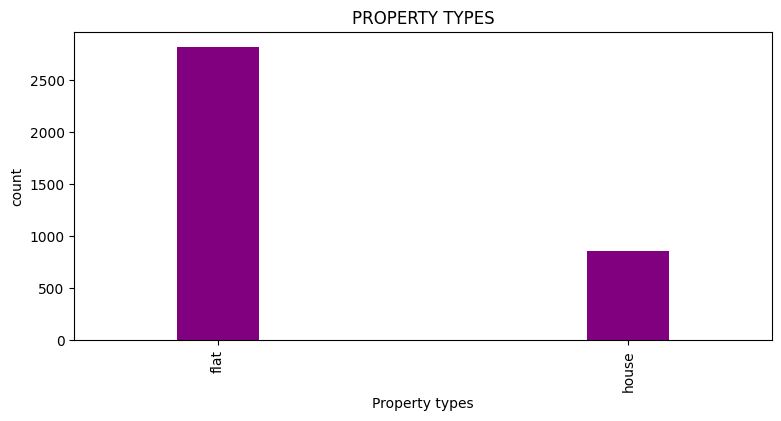

In [ ]:
plt.figure(figsize=(9, 4))
property_type = dataset["property_type"].value_counts().plot(kind='bar',color='purple',width=0.2)
plt.ylabel('count')
plt.xlabel('Property types')
plt.title('PROPERTY TYPES')
plt.show()

In [ ]:
percentage_property = dataset['property_type'].value_counts(normalize=True) * 100
percentage_property

property_type
flat     76.638564
house    23.361436
Name: proportion, dtype: float64

## Missing values

In [ ]:
missing_property= dataset["property_type"].isnull().sum()
missing_property

0

## Property type Vs Price (Histogram and Box plot)

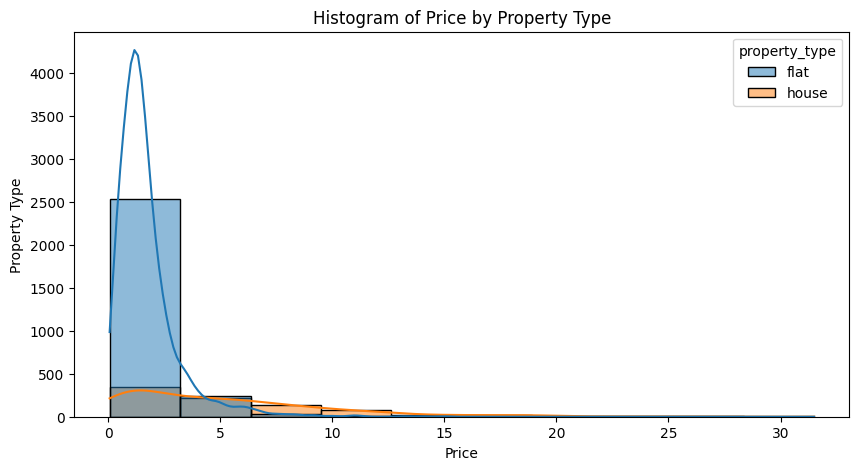

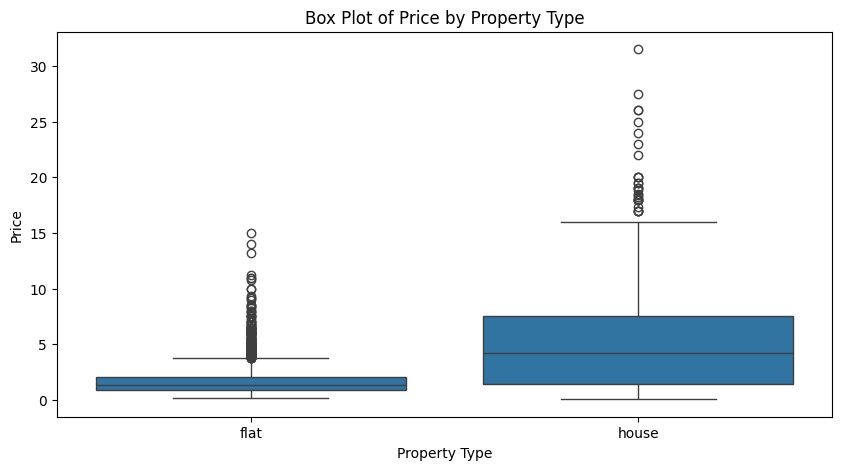

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='property_type',kde=True,bins=10)
plt.title('Histogram of Price by Property Type')
plt.xlabel('Price')
plt.ylabel('Property Type')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='property_type', y='price')
plt.title('Box Plot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

## One hot encoding (Converting categorical to numerical)

In [ ]:
#property_encoded = pd.get_dummies(dataset['property_type'], prefix='property_type')
#dataset = pd.concat([dataset, property_encoded], axis=1)

In [ ]:
#Drop the original property_type column
#dataset.drop('property_type', axis=1, inplace=True)
#dataset.head()

## Outlier Handling - Property Type

In [ ]:
dataset['property_type'].describe()

count     3677
unique       2
top       flat
freq      2818
Name: property_type, dtype: object

In [ ]:
dataset['property_type'].value_counts()

property_type
flat     2818
house     859
Name: count, dtype: int64

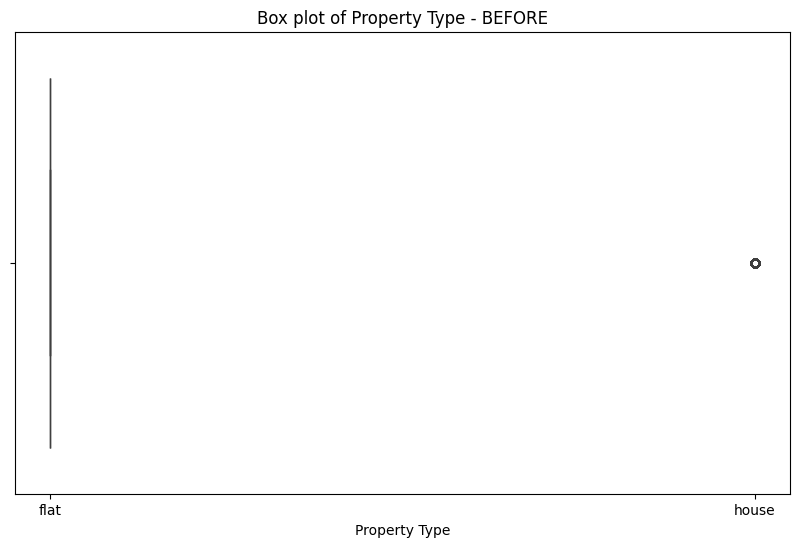

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='property_type')
plt.title("Box plot of Property Type - BEFORE")
plt.xlabel("Property Type")
plt.show()

In [ ]:
# Q1 = dataset['property_type'].quantile(0.25)
# Q3 = dataset['property_type'].quantile(0.75)
# IQR = Q3 - Q1
# outlier_indices = (dataset['property_type'] < (Q1 - 1.5 * IQR)) | (dataset['property_type'] > (Q3 + 1.5 * IQR))

# IQR
# dataset['property_type'] = np.where(outlier_indices, dataset['property_type'].median(), dataset['property_type'])

## dropping houses

In [ ]:
#dataset = dataset[dataset['property_type'] != 'house']

## OBSERVATIONS FOR PROPERTY:
---

1.There are around 76% flats and 23% Independent houses. (Number of flats in gurgaon is more than the number of houses)

2.It is a categorical feature

3.There are no missing values

# **2.SOCIETY COLUMN**

## Exploration

In [ ]:
dataset['society'].describe()
dataset['society'].value_counts().head(10)

society
independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
signature global park                    35
shree vardhman victoria                  34
emaar mgf emerald floors premier         32
smart world orchard                      32
paras dews                               31
Name: count, dtype: int64

In [ ]:
society_categories = dataset['society'].nunique()
society_categories

676

##dropping independent houses


In [ ]:
dataset = dataset[dataset['society'] != 'independent']

## Binning

In [ ]:
societybins = pd.qcut(dataset['society'].value_counts(), 4, labels=['low','medium','high'],duplicates='drop')
dataset['society_bins'] = dataset['society'].map(societybins)
dataset['society_bins'].value_counts()

<ipython-input-32-d5bf25b0280c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['society_bins'] = dataset['society'].map(societybins)


society_bins
high      2257
low        496
medium     437
Name: count, dtype: int64

## Bar graph

<Axes: xlabel='society_bins'>

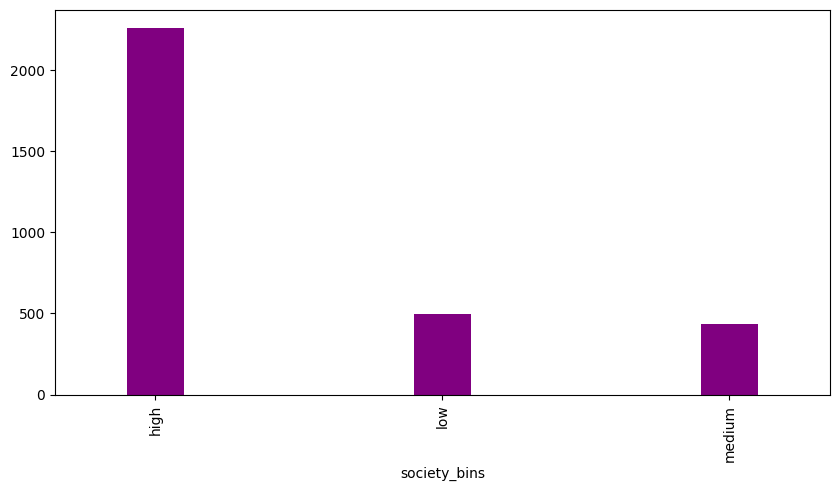

In [ ]:
plt.figure(figsize=(10, 5))
dataset['society_bins'].value_counts().hist(color='purple')
dataset["society_bins"].value_counts().plot(kind='bar',color='purple',width=0.2)

In [ ]:
dataset.groupby('society')['property_type'].value_counts()

society               property_type
.                     flat             1
4s aradhya homes      house            1
                      flat             1
511 sarahah tower     flat             1
aardhya homesh        flat             1
                                      ..
whiteland blissville  flat             3
whiteland the aspen   flat             1
wings apartment       flat             1
woodstock floors      flat             1
zara aavaas           flat             8
Name: count, Length: 727, dtype: int64

In [ ]:
dataset.groupby('society')['price'].value_counts()

society            price
.                  7.00     1
4s aradhya homes   1.90     1
                   1.83     1
511 sarahah tower  0.60     1
aardhya homesh     1.85     1
                           ..
zara aavaas        0.40     2
                   0.49     1
                   0.26     1
                   0.22     1
                   0.65     1
Name: count, Length: 2562, dtype: int64

In [ ]:
#Number of independent houses in society
dataset[dataset['society'] == 'independent']

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,society_bins


## Top 10 societies

In [ ]:
societies=dataset.groupby('society')['property_type'].value_counts().sort_values(ascending=False).head(10)
societies

society                               property_type
tulip violet                          flat             75
ss the leaf                           flat             73
shapoorji pallonji joyville gurugram  flat             42
dlf new town heights                  flat             38
shree vardhman victoria               flat             34
signature global park                 flat             34
emaar mgf emerald floors premier      flat             32
paras dews                            flat             31
smart world orchard                   flat             31
dlf the ultima                        flat             31
Name: count, dtype: int64

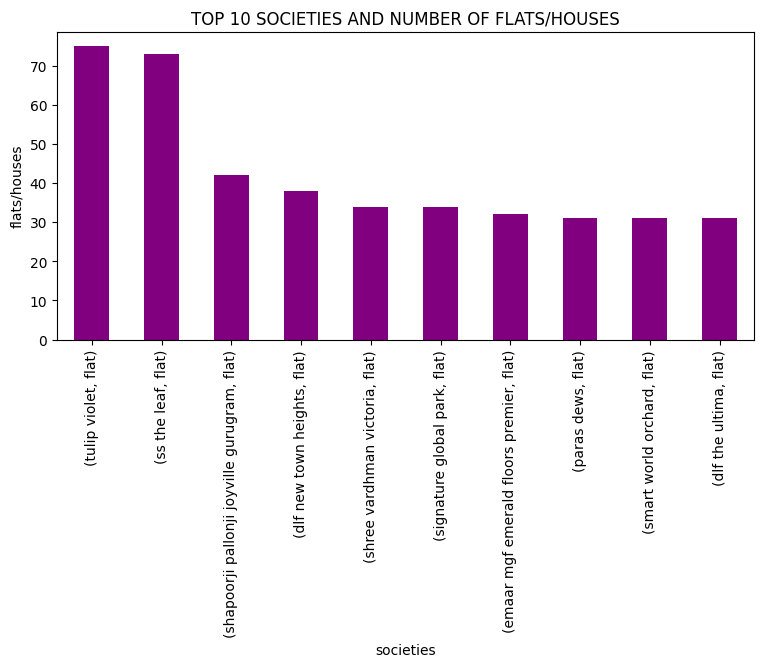

In [ ]:
plt.figure(figsize=(9, 4))
societies.plot(kind='bar',color='purple',width=0.5)
plt.ylabel('flats/houses')
plt.xlabel('societies')
plt.title('TOP 10 SOCIETIES AND NUMBER OF FLATS/HOUSES')
plt.show()

## Society vs Price (Histogram and box plot)

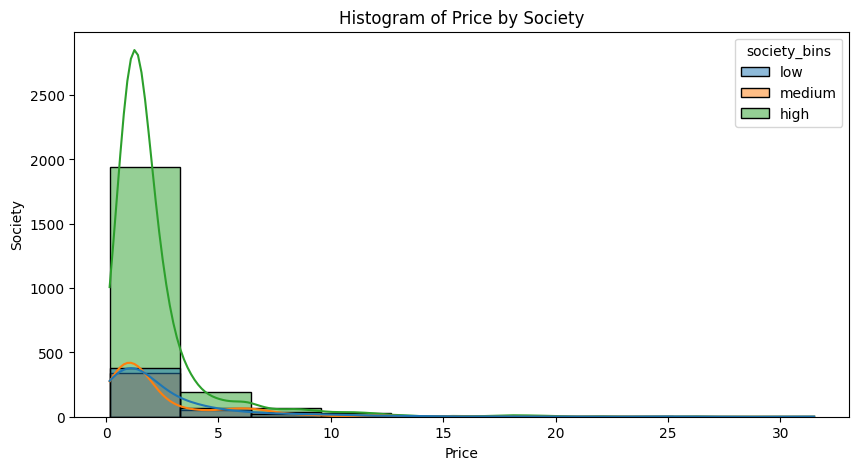

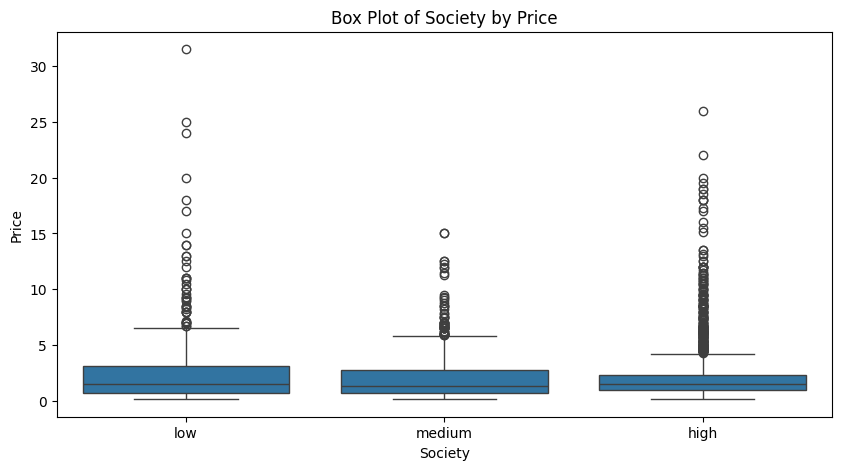

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='society_bins',kde=True, bins=10)
plt.title('Histogram of Price by Society')
plt.xlabel('Price')
plt.ylabel('Society')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='society_bins', y='price')
plt.title('Box Plot of Society by Price')
plt.xlabel('Society')
plt.ylabel('Price')
plt.show()

## Missing values

In [ ]:
missing_society= dataset["society"].isnull().sum()
missing_society

1

## Handling missing values

In [ ]:
# dataset = dataset.dropna(subset='society')

societyMode = dataset['society'].mode()[0]
societyMode

dataset['society'].fillna(societyMode,inplace=True)
dataset['society'].isnull().sum()

0

## onehot encoding

In [ ]:
#society_encoded = pd.get_dummies(dataset['society_bins'])
#dataset = pd.concat([dataset, society_encoded], axis=1)

## **OBSERVATIONS FOR SOCIETY:**
1. It is a categorical feature
2. It has 676 unique categories
3. independent society has the most number of properties
4. most of the properties belong to the top 20% societies

# **3. SECTOR COLUMN**

## Exploration

In [ ]:
dataset['sector'].describe()
dataset['sector'].value_counts()

sector
sohna road    157
sector 85     108
sector 102    107
sector 92      99
sector 69      92
             ... 
sector 55       3
sector 46       2
sector 40       2
sector 23       2
sector 13       1
Name: count, Length: 102, dtype: int64

In [ ]:
sector_categories = dataset['society'].nunique()
sector_categories

675

## Binning

In [ ]:
sectorbins = pd.qcut(dataset['sector'].value_counts(ascending=False), 3, labels=['low','medium','high'],duplicates='drop')
dataset['sector_bins'] = dataset['sector'].map(sectorbins)
dataset['sector_bins'].value_counts()

sector_bins
high      2255
medium     711
low        225
Name: count, dtype: int64

In [ ]:
dataset['sector'].value_counts()

sector
sohna road    157
sector 85     108
sector 102    107
sector 92      99
sector 69      92
             ... 
sector 55       3
sector 46       2
sector 40       2
sector 23       2
sector 13       1
Name: count, Length: 102, dtype: int64

In [ ]:
dataset['sector_bins']

0       medium
1         high
2         high
3         high
4         high
         ...  
3797       low
3798      high
3799      high
3800      high
3802    medium
Name: sector_bins, Length: 3191, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

## Bar graph

<Axes: xlabel='sector_bins'>

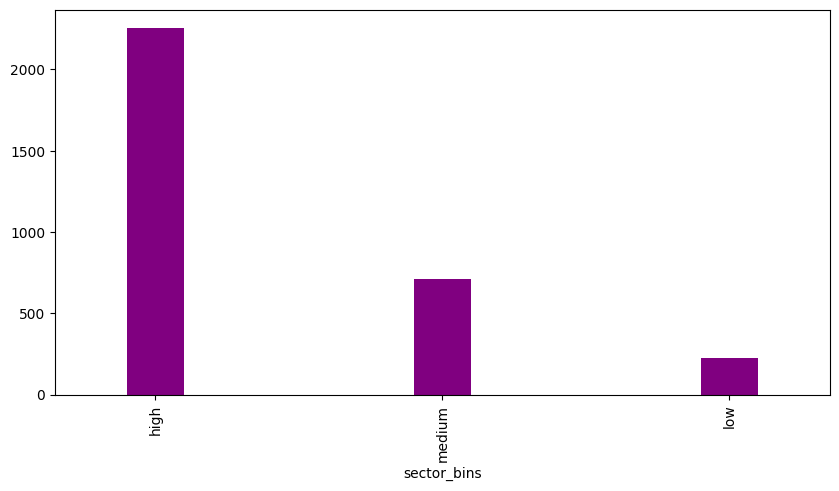

In [ ]:
plt.figure(figsize=(10, 5))
dataset['sector_bins'].value_counts().hist(color='purple')
dataset["sector_bins"].value_counts().plot(kind='bar',color='purple',width=0.2)

## Sector Vs Price (Histogram and box plot)

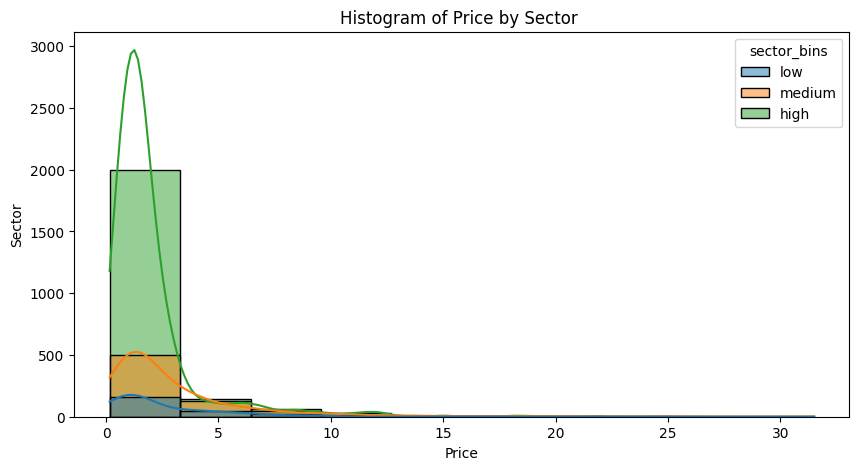

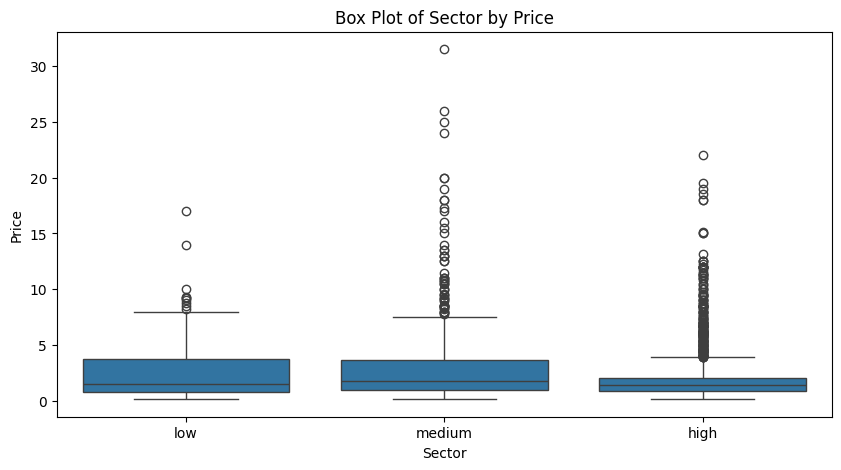

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='sector_bins', kde=True, bins=10)
plt.title('Histogram of Price by Sector ')
plt.xlabel('Price')
plt.ylabel('Sector')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='sector_bins', y='price')
plt.title('Box Plot of Sector by Price')
plt.xlabel('Sector')
plt.ylabel('Price')
plt.show()

## Missing values

In [ ]:
missing_sector=dataset["sector"].isnull().sum()
missing_sector

0

## encoding

In [ ]:
#sector_encoded = pd.get_dummies(dataset['sector_bins'])
#dataset = pd.concat([dataset, sector_encoded], axis=1)

#label_encoder = LabelEncoder()
#label_encoder.fit(dataset['sector'])
#dataset['sector'] = label_encoder.transform(dataset['sector'])

## **Observations:**
1.  It is a categorical feature.
2. There are no missing values
3. It has 664 unique categories

# **4.PRICE COLUMN**

## Exploration

In [ ]:
dataset['price'].describe()

count    3179.000000
mean        2.244250
std         2.579393
min         0.160000
25%         0.930000
50%         1.460000
75%         2.400000
max        31.500000
Name: price, dtype: float64

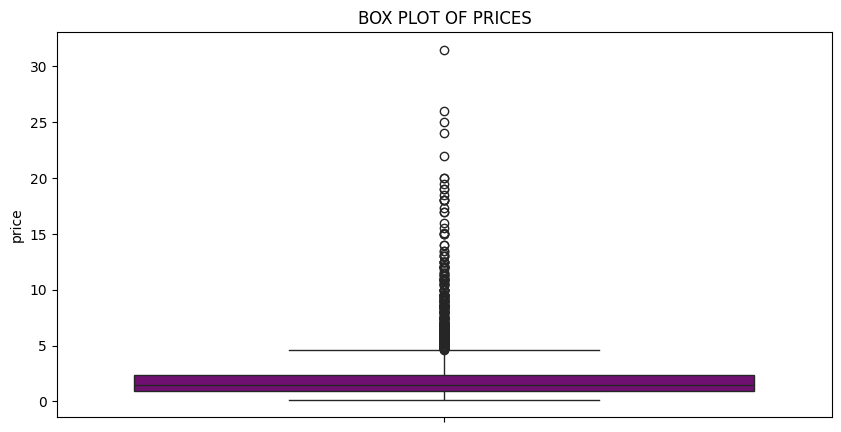

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['price'],color='purple')
plt.title('BOX PLOT OF PRICES')
plt.show()

## Skewness & Kurtosis

In [ ]:
dataset['price'].skew()

3.7770055107853175

In [ ]:
dataset['price'].kurtosis()

21.032439835649537

## Missing Values

In [ ]:
missing_prices= dataset["price"].isnull()
missing_prices.sum()

12

In [ ]:
missing = dataset[dataset['price'].isnull()]
missing[['bedRoom', 'price']]

,bedRoom,price
38,5,NaN
304,5,NaN
596,4,NaN
813,9,NaN
922,5,NaN
1419,5,NaN
1974,2,NaN
2013,5,NaN
2139,5,NaN
2201,5,NaN


## Handling Missing values

find the corresponding bedroom counts of missing price values
replace the missing price values with mean price of the corresponding bedroom count

In [ ]:
missing_prices = dataset['price'].isnull()
bedrooms = dataset.loc[missing_prices.index, 'bedRoom']
mean_prices_by_bedroom = dataset.groupby('bedRoom')['price'].mean()
mean_prices_by_bedroom

bedRoom
1      0.517551
2      0.900953
3      1.912791
4      3.663537
5      7.585225
6      7.150000
7      7.727692
8      4.344286
9      7.433333
10     5.116667
12     7.975000
13     4.650000
16    17.500000
18     7.050000
Name: price, dtype: float64

In [ ]:
for bedrooms_count in range(22):
    mean_price = dataset[dataset['bedRoom'] == bedrooms_count]['price'].mean()
    dataset.loc[(dataset['bedRoom'] == bedrooms_count) & (dataset['price'].isnull()), 'price'] = mean_price


In [ ]:
#prices = dataset['price'].values.reshape(-1, 1)
#knn_impute = KNNImputer(n_neighbors = 5)

#dataset['price'] = knn_impute.fit_transform(dataset[['price']])

In [ ]:
missing_prices_val= dataset["price"].isnull()
missing_prices_val.sum()

0

## Outlier Detection

In [ ]:
q1 = dataset['price'].quantile(0.25) # 25th percentile
q3 = dataset['price'].quantile(0.75) #75th percentile
IQR_price = q3-q1
k = IQR_price*1.5
outliers_price = dataset[(dataset['price']< q1-k )| (dataset['price']>q3+k)]
print("No. of outliers:",len(outliers_price))
print("IQR:",IQR_price)

No. of outliers: 350
IQR: 1.46


##Outlier Handling - Winsorization

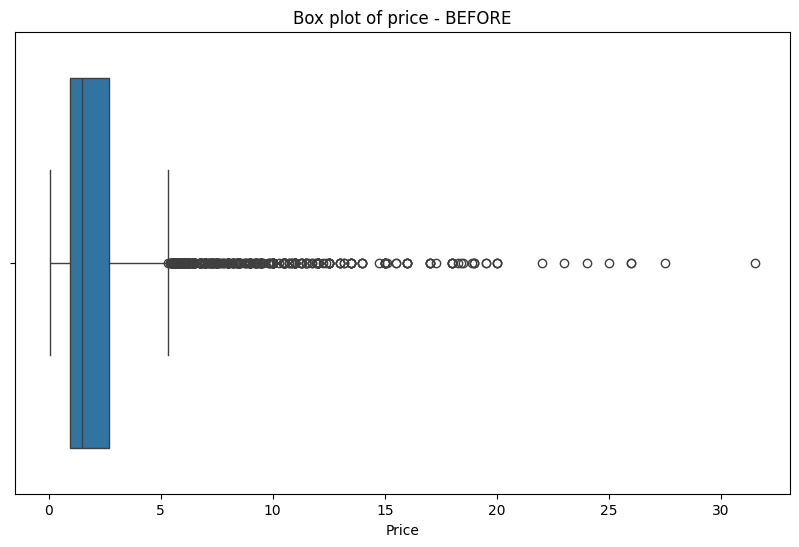

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price')
plt.title("Box plot of price - BEFORE")
plt.xlabel("Price")
plt.show()

In [ ]:
dataset['price'].describe()

count    3191.000000
mean        2.260964
std         2.591926
min         0.160000
25%         0.940000
50%         1.470000
75%         2.400000
max        31.500000
Name: price, dtype: float64

In [ ]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR))

IQR
dataset['price'] = np.where(outlier_indices, dataset['price'].median(), dataset['price'])


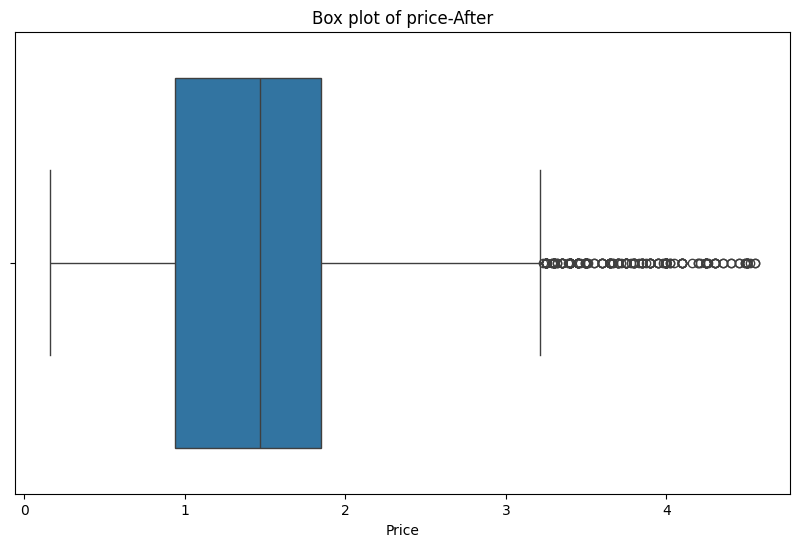

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='price')
plt.title("Box plot of price-After")
plt.xlabel("Price")
plt.show()

In [ ]:
q1 = dataset['price'].quantile(0.25)
q3 = dataset['price'].quantile(0.75)
IQR_price = q3-q1
k = IQR_price*1.5
outliers_price = dataset[(dataset['price']< q1-k )| (dataset['price']>q3+k)]
print("No. of outliers:",len(outliers_price))
print("IQR:",IQR_price)

No. of outliers: 199
IQR: 0.9100000000000001


In [ ]:
dataset['price'].describe()

count    3191.000000
mean        1.520616
std         0.860321
min         0.160000
25%         0.940000
50%         1.470000
75%         1.850000
max         4.550000
Name: price, dtype: float64

## **Observations:**
1. It is a numeric feature
2. There are 350 outliers
3. 12 missing values


# **5. PRICE PER SQFT COLUMN**

## Exploration

In [ ]:
dataset['price_per_sqft'].describe()

count      3179.000000
mean      12026.191255
std       20611.737378
min           4.000000
25%        6663.500000
50%        8620.000000
75%       12261.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

## Box plot

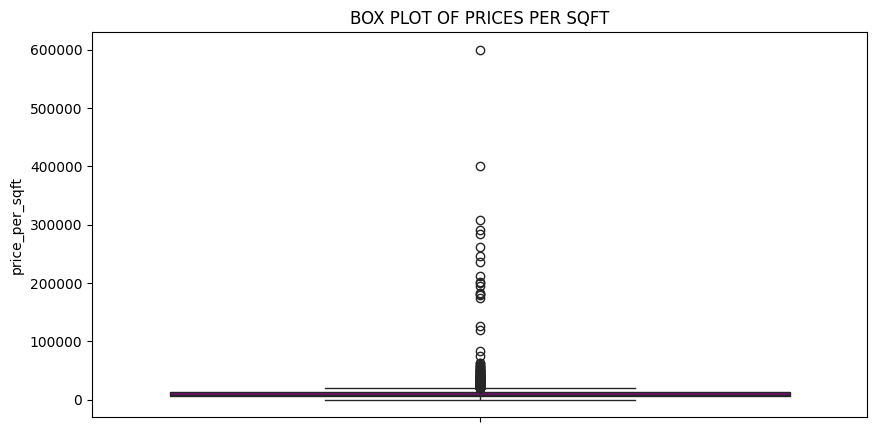

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['price_per_sqft'],color='purple')
plt.title('BOX PLOT OF PRICES PER SQFT')
plt.show()

In [ ]:
dataset['price_per_sqft_bin'] = pd.cut(dataset['price_per_sqft'], [0, 10000, 50000, 100000, 600000])
dataset['price_per_sqft_bin'].value_counts()

price_per_sqft_bin
(0, 10000]          1990
(10000, 50000]      1159
(100000, 600000]      18
(50000, 100000]       12
Name: count, dtype: int64

## Bar plot

<Axes: xlabel='price_per_sqft_bin'>

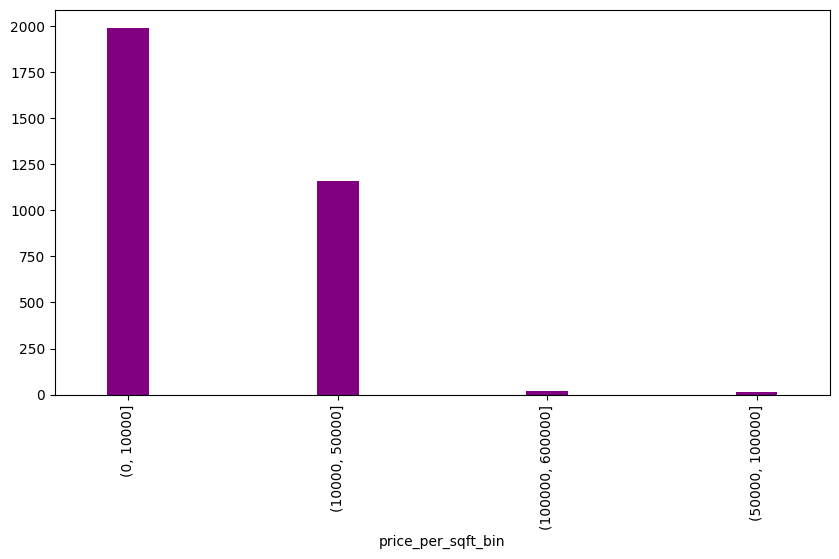

In [ ]:
plt.figure(figsize=(10, 5))
dataset['price_per_sqft_bin'].value_counts().hist(color='purple')
dataset['price_per_sqft_bin'].value_counts().plot(kind='bar',color='purple',width=0.2)

## Price Vs price per sqft- (Histogram and box plot)

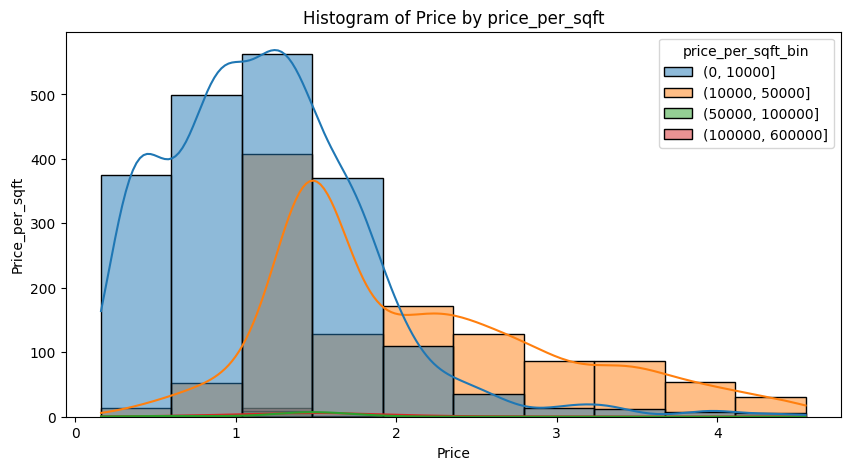

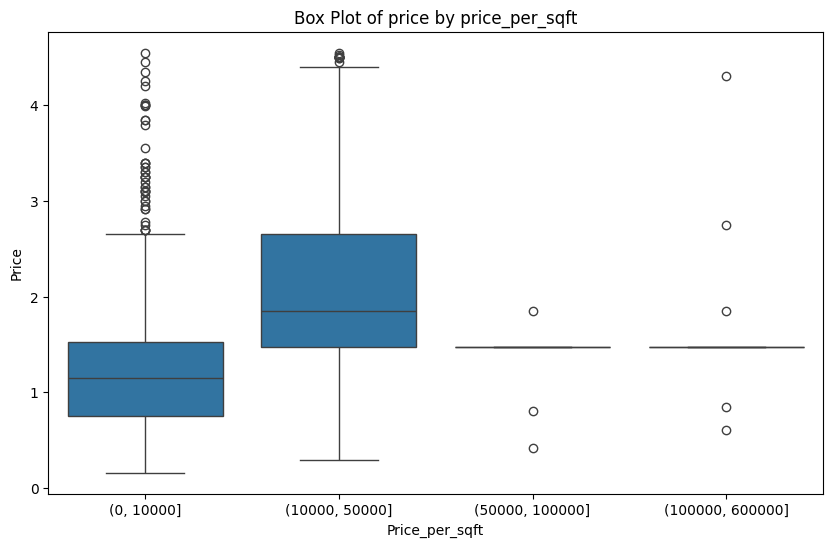

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='price_per_sqft_bin', kde=True, bins=10)
plt.title('Histogram of Price by price_per_sqft')
plt.xlabel('Price')
plt.ylabel('Price_per_sqft')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='price_per_sqft_bin', y='price')
plt.title('Box Plot of price by price_per_sqft')
plt.xlabel('Price_per_sqft')
plt.ylabel('Price')
plt.show()

## Skewness & Kurtosis

In [ ]:
dataset['price_per_sqft'].skew()

15.12378033464724

In [ ]:
dataset['price_per_sqft'].kurtosis()

310.4640094731015

## Missing values

In [ ]:
missing_ppsqft= dataset["price_per_sqft"].isnull().sum()
missing_ppsqft

12

## Handling Missing values

In [ ]:
ppsqft = dataset['price_per_sqft'].values.reshape(-1, 1)
knn_impute = KNNImputer(n_neighbors = 5)

dataset['price_per_sqft'] = knn_impute.fit_transform(dataset[['price_per_sqft']])

In [ ]:
missing_ppsqft= dataset["price_per_sqft"].isnull().sum()
missing_ppsqft

0

## Outlier detection

In [ ]:
dataset['price_per_sqft'].describe()

count      3191.000000
mean      12026.191255
std       20572.932692
min           4.000000
25%        6666.000000
50%        8638.000000
75%       12239.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [ ]:
q1 = dataset['price_per_sqft'].quantile(0.25) # 25th percentile
q3 = dataset['price_per_sqft'].quantile(0.75) #75th percentile
IQR_price_persqft = q3-q1 #interquartile range
k = IQR_price_persqft*1.5
outliers_price_persqft = dataset[(dataset['price_per_sqft']< q1-k )| (dataset['price_per_sqft']>q3+k)]
print("No. of outliers:",len(outliers_price_persqft))
#print(outliers_price_persqft)
print("IQR:",IQR_price_persqft)

No. of outliers: 255
IQR: 5573.5


## Outlier Handling- Price per sqft (Winsorization)

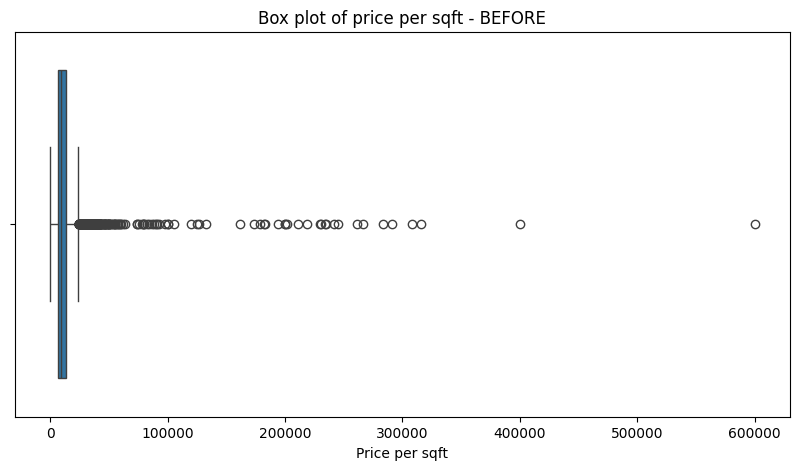

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='price_per_sqft')
plt.title("Box plot of price per sqft - BEFORE")
plt.xlabel("Price per sqft")
plt.show()

In [ ]:
dataset['price_per_sqft'].describe()

count      3191.000000
mean      12026.191255
std       20572.932692
min           4.000000
25%        6666.000000
50%        8638.000000
75%       12239.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [ ]:
Q1 = dataset['price_per_sqft'].quantile(0.25)
Q3 = dataset['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['price_per_sqft'] < (Q1 - 1.5 * IQR)) | (dataset['price_per_sqft'] > (Q3 + 1.5 * IQR))

IQR
dataset['price_per_sqft'] = np.where(outlier_indices, dataset['price_per_sqft'].median(), dataset['price_per_sqft'])

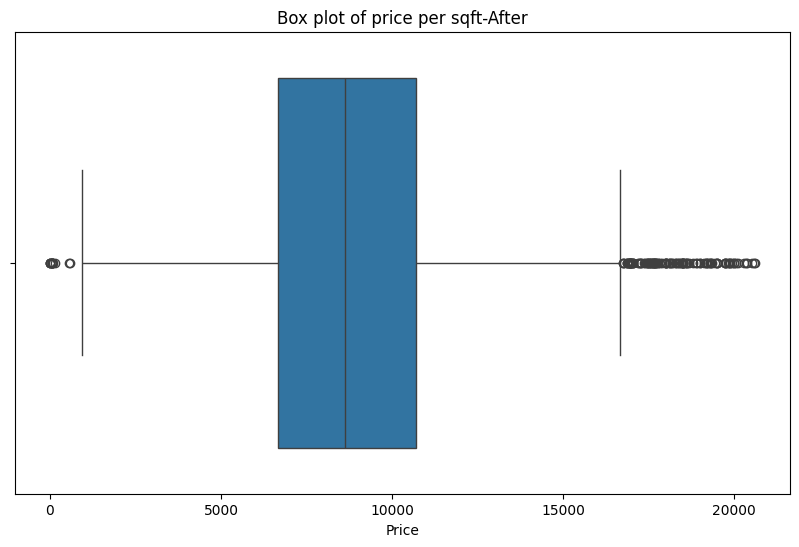

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='price_per_sqft')
plt.title("Box plot of price per sqft-After")
plt.xlabel("Price")
plt.show()

In [ ]:
dataset['price_per_sqft'].describe()

count     3191.000000
mean      9066.765997
std       3405.571211
min          4.000000
25%       6666.000000
50%       8638.000000
75%      10697.500000
max      20599.000000
Name: price_per_sqft, dtype: float64

## **Observations:**
1. IT'S A NUMERICAL FEATURE
2. IT HAS 255 OUTLIERS
3. THE MAX price_per_sqft is 17,777Rs
4. MAJORITY OF THE HOUSES ARE PRICED AT Rs.10,481
5. 12 MISSING

# **6.AREA COLUMN**

## Exploration

In [ ]:
dataset['area'].describe()

count      3179.000000
mean       2897.018874
std       24484.333437
min          50.000000
25%        1262.000000
50%        1735.000000
75%        2250.000000
max      875000.000000
Name: area, dtype: float64

## Binning

In [ ]:
dataset['area_bin'] = pd.cut(dataset['area'], [50, 1000, 10000, 50000, 900000])
dataset['area_bin'].value_counts()

area_bin
(1000, 10000]      2621
(50, 1000]          539
(50000, 900000]      10
(10000, 50000]        7
Name: count, dtype: int64

## Box plot

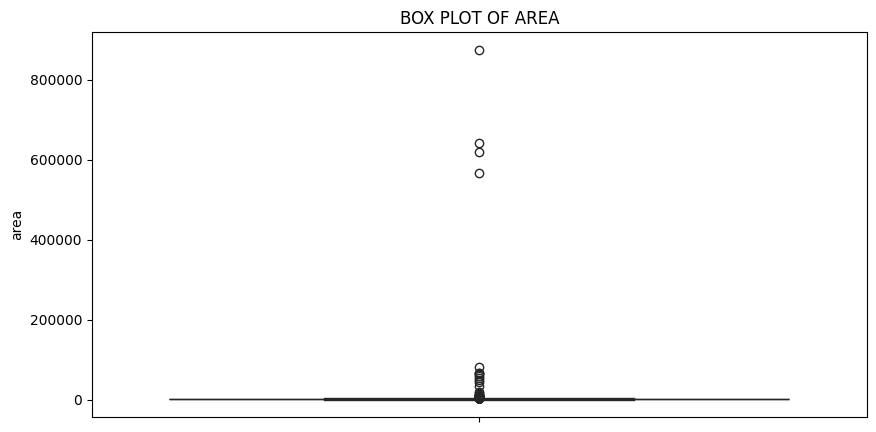

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['area'],color='purple')
plt.title('BOX PLOT OF AREA')
plt.show()

## area vs price

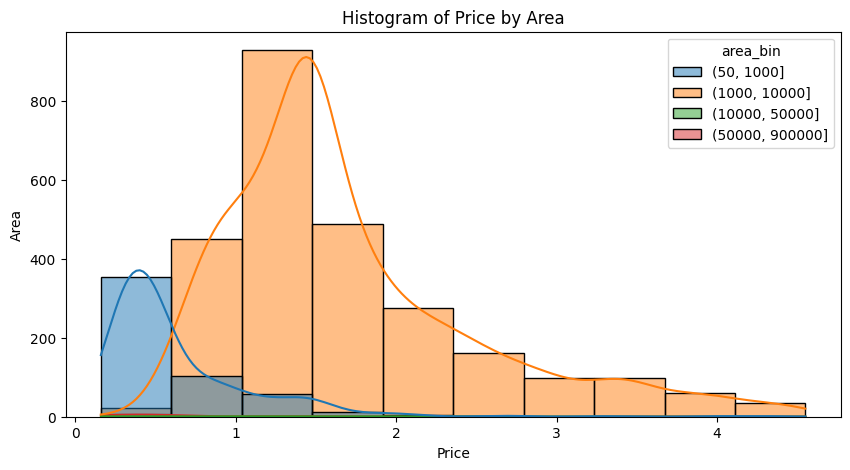

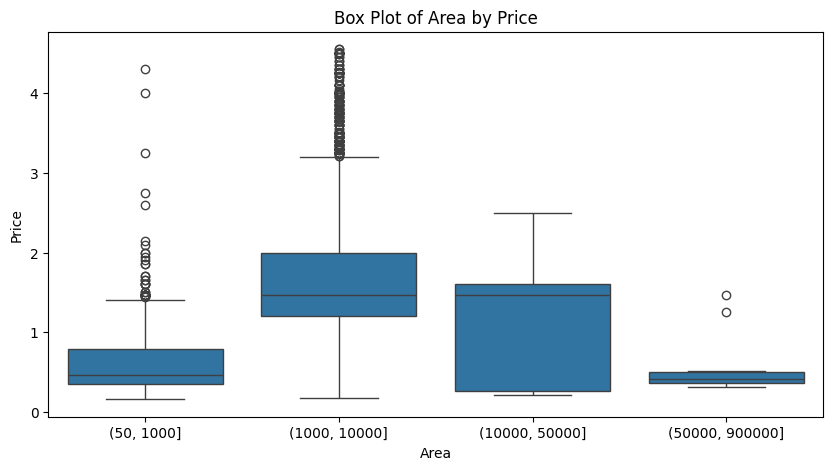

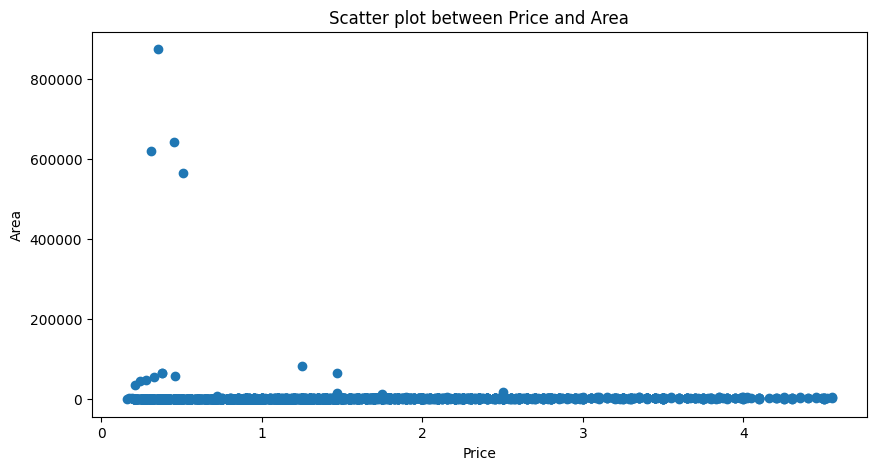

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='area_bin', kde=True, bins=10)
plt.title('Histogram of Price by Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='area_bin', y='price')
plt.title('Box Plot of Area by Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter( dataset['price'],dataset['area'])
plt.ylabel('Area')
plt.xlabel('Price')
plt.title('Scatter plot between Price and Area')
plt.show()

## Skewness & Kurtosis

In [ ]:
dataset['area'].skew()

28.773449667413526

In [ ]:

dataset['area'].kurtosis()

867.5068425055249

## Missing Values

In [ ]:
missing_area= dataset["area"].isnull().sum()
missing_area

12

## Handling Missing values

In [ ]:
areas = dataset['area'].values.reshape(-1, 1)
knn_impute = KNNImputer(n_neighbors = 5)

dataset['area'] = knn_impute.fit_transform(dataset[['area']])

In [ ]:
missing_area= dataset["area"].isnull().sum()
missing_area

0

## Outliers Detection

In [ ]:
q1 = dataset['area'].quantile(0.25) # 25th percentile
q3 = dataset['area'].quantile(0.75) #75th percentile
IQR_area = q3-q1 #interquartile range
k = IQR_area*1.5
outliers_area = dataset[(dataset['area']< q1-k )| (dataset['area']>q3+k)]
print("No. of outliers:",len(outliers_area))
#print(outliers_area)
print("IQR:",IQR_area)

No. of outliers: 186
IQR: 996.5


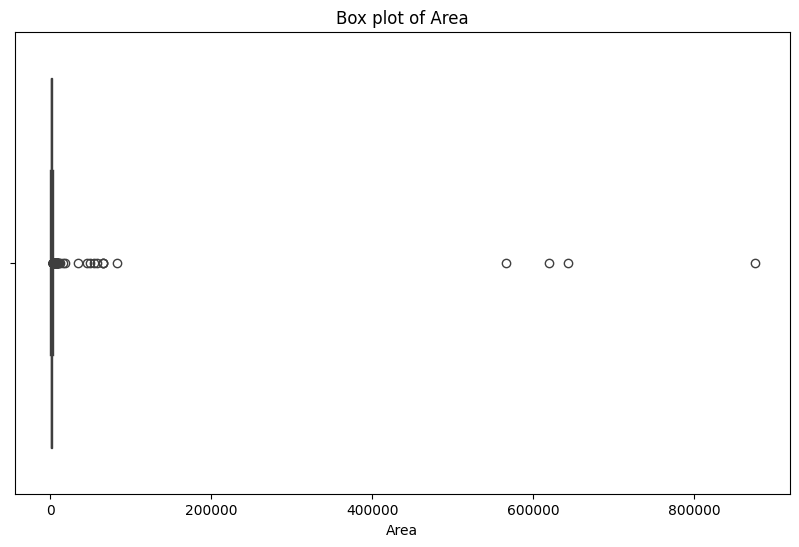

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='area')
plt.title("Box plot of Area")
plt.xlabel("Area")
plt.show()

## Outliers Handling - Area(Winsorization)

In [ ]:
dataset['area'].describe()

count      3191.000000
mean       2897.018874
std       24438.238008
min          50.000000
25%        1264.000000
50%        1740.000000
75%        2260.500000
max      875000.000000
Name: area, dtype: float64

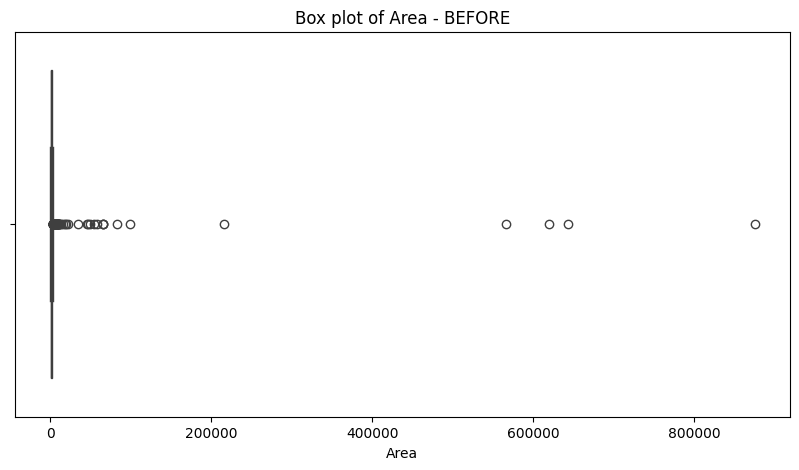

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='area')
plt.title("Box plot of Area - BEFORE")
plt.xlabel("Area")
plt.show()

In [ ]:
Q1 = dataset['area'].quantile(0.25)
Q3 = dataset['area'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['area'] < (Q1 - 1.5 * IQR)) | (dataset['area'] > (Q3 + 1.5 * IQR))

IQR
dataset['area'] = np.where(outlier_indices, dataset['area'].median(), dataset['area'])

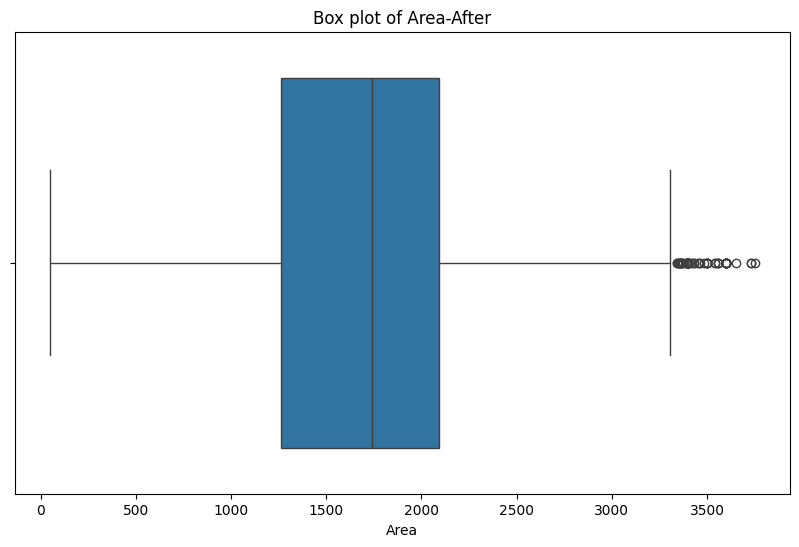

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='area')
plt.title("Box plot of Area-After")
plt.xlabel("Area")
plt.show()

In [ ]:
dataset['area'].describe()

count    3191.000000
mean     1697.247016
std       697.720641
min        50.000000
25%      1264.000000
50%      1740.000000
75%      2093.000000
max      3750.000000
Name: area, dtype: float64

## **Observations:**
1. IT IS A NUMERICAL FEATURE
2. IT HAS 186 OUTLIERS
3. HAS 12 MISSING VALUE
4. MAX AREA IS 3434sqft
5. MAJORITY FLATS HAD AREA OF 2040sqft

# **7.AREA WITH TYPE COLUMN**

## Exploration

In [ ]:
dataset['areaWithType'].describe()

count                            3191
unique                           2121
top       Plot area 360(301.01 sq.m.)
freq                               20
Name: areaWithType, dtype: object

In [ ]:
dataset['areaWithType'].value_counts()

areaWithType
Plot area 360(301.01 sq.m.)                                                      20
Super Built up area 1578(146.6 sq.m.)                                            17
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)    17
Super Built up area 1350(125.42 sq.m.)                                           15
Super Built up area 2010(186.74 sq.m.)                                           14
                                                                                 ..
Plot area 232(193.98 sq.m.)                                                       1
Super Built up area 1980(183.95 sq.m.)                                            1
Carpet area: 2302 (213.86 sq.m.)                                                  1
Super Built up area 576(53.51 sq.m.)Carpet area: 480.53 sq.ft. (44.64 sq.m.)      1
Super Built up area 583(54.16 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.)         1
Name: count, Length: 2121, dtype: int64

## Missing Values

In [ ]:
missing_areatype=dataset["areaWithType"].isnull().sum()
missing_areatype

0

## **Observations:**
1. There are no missing values
2. it is a categorial column which specifies the built up areas

# **8.BEDROOM COLUMN**

## Exploration

In [ ]:
dataset['bedRoom'].describe()

count    3191.000000
mean        3.059542
std         1.312430
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: bedRoom, dtype: float64

In [ ]:
dataset['bedRoom'].value_counts()

bedRoom
3     1419
2      893
4      575
5      120
1       98
6       31
7       13
9       13
12      10
8        7
10       6
16       3
13       2
18       1
Name: count, dtype: int64

## Bining

In [ ]:
dataset['bedroom_bin'] = pd.cut(dataset['bedRoom'], [0, 3, 7, 21])
dataset['bedroom_bin'].value_counts()

bedroom_bin
(0, 3]     2410
(3, 7]      739
(7, 21]      42
Name: count, dtype: int64

## Bar plot

<Axes: xlabel='bedroom_bin'>

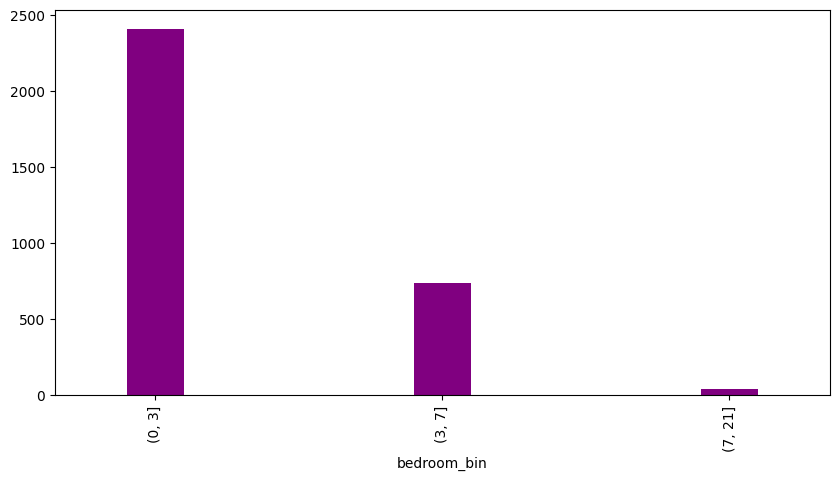

In [ ]:
plt.figure(figsize=(10, 5))
dataset['bedroom_bin'].value_counts().hist(color='purple')
dataset['bedroom_bin'].value_counts().plot(kind='bar',color='purple',width=0.2)

## Box plot

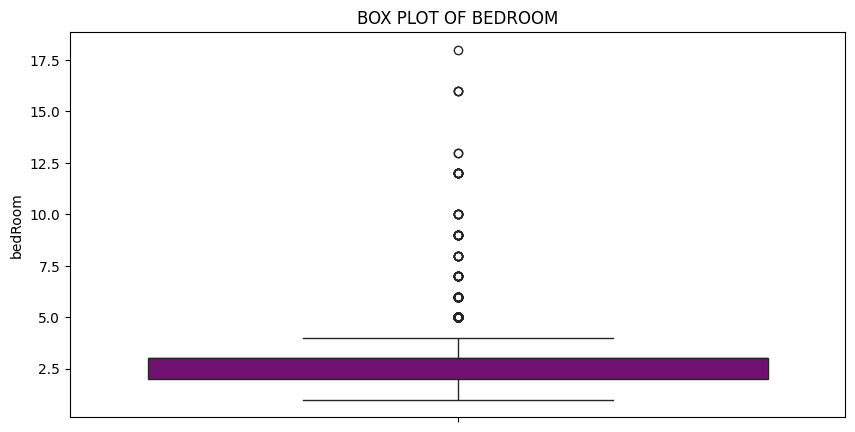

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['bedRoom'],color='purple')
plt.title('BOX PLOT OF BEDROOM')
plt.show()

In [ ]:
dataset['bedroom_bin'].value_counts()

bedroom_bin
(0, 3]     2410
(3, 7]      739
(7, 21]      42
Name: count, dtype: int64

## Price Vs Bedroom - (Histogram and box plot)

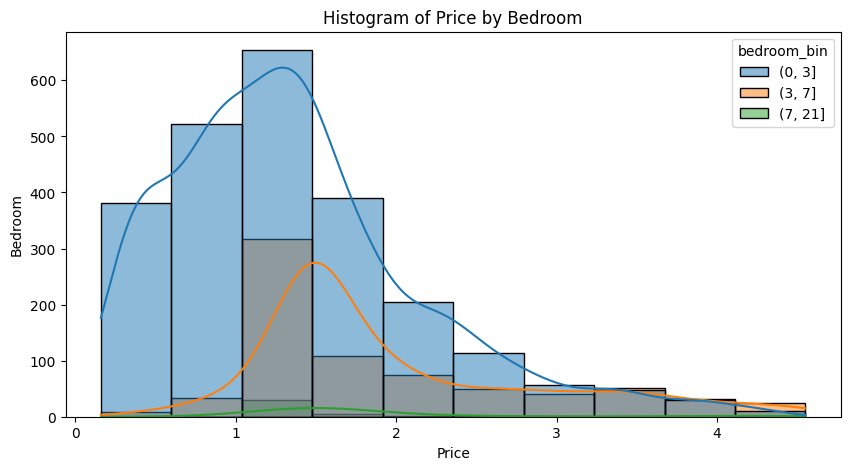

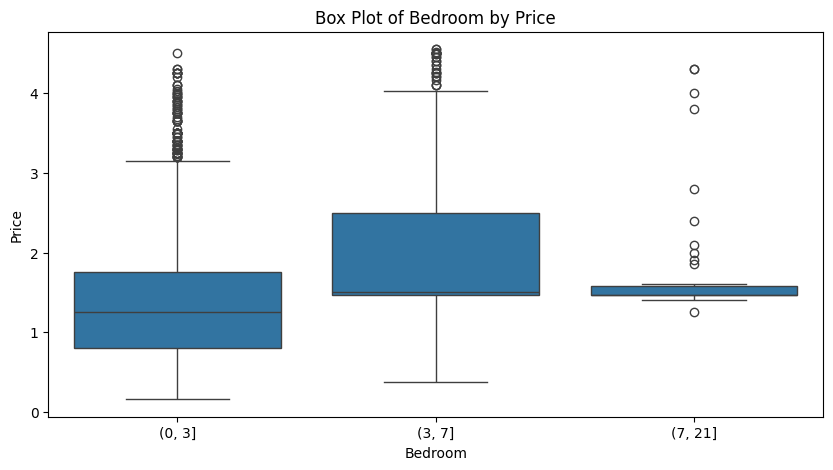

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='bedroom_bin',kde=True, bins=10)
plt.title('Histogram of Price by Bedroom')
plt.xlabel('Price')
plt.ylabel('Bedroom')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='bedroom_bin', y='price')
plt.title('Box Plot of Bedroom by Price')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

## Missing Values

In [ ]:
missing_bedrooms= dataset["bedRoom"].isnull().sum()
missing_bedrooms

0

## Outliers Detection

In [ ]:
q1 = dataset['bedRoom'].quantile(0.25) # 25th percentile
q3 = dataset['bedRoom'].quantile(0.75) #75th percentile
IQR_bedroom = q3-q1 #interquartile range
k = IQR_bedroom*1.5
outliers_bedroom = dataset[(dataset['bedRoom']< q1-k )| (dataset['bedRoom']>q3+k)]
print("No. of outliers:",len(outliers_bedroom))
#print(outliers_bedroom)
print("IQR:",IQR_bedroom)

No. of outliers: 206
IQR: 1.0


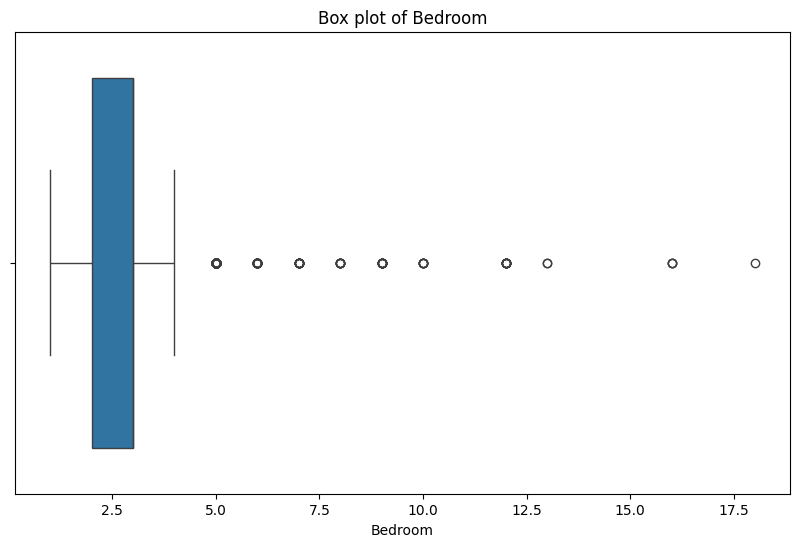

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='bedRoom')
plt.title("Box plot of Bedroom")
plt.xlabel("Bedroom")
plt.show()

## Outlier Handling - Trimming

In [ ]:
dataset['bedRoom'].describe()

count    3191.000000
mean        3.059542
std         1.312430
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: bedRoom, dtype: float64

In [ ]:
Q1 = dataset['bedRoom'].quantile(0.25)
Q3 = dataset['bedRoom'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = dataset[(dataset['bedRoom'] < (Q1 - 1.5 * IQR)) | (dataset['bedRoom'] > (Q3 + 1.5 * IQR))]
outlier_indices['bedRoom'].describe()

count    206.000000
mean       6.417476
std        2.459523
min        5.000000
25%        5.000000
50%        5.000000
75%        7.000000
max       18.000000
Name: bedRoom, dtype: float64

In [ ]:
dataset = dataset[dataset['bedRoom'] < 10]

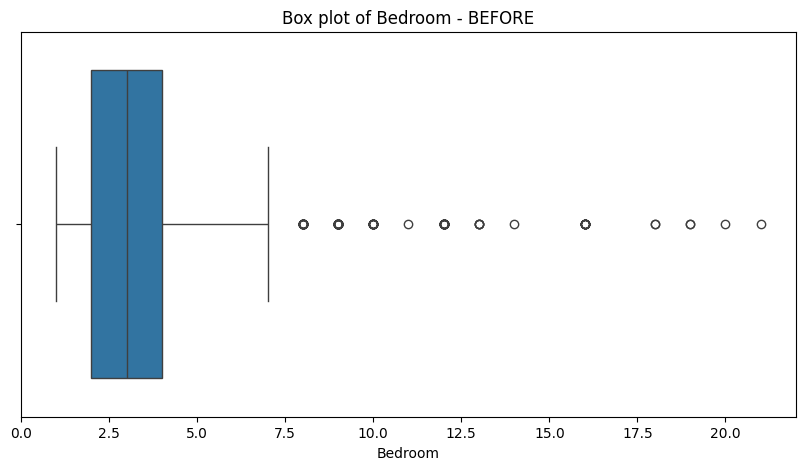

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='bedRoom')
plt.title("Box plot of Bedroom - BEFORE")
plt.xlabel("Bedroom")
plt.show()

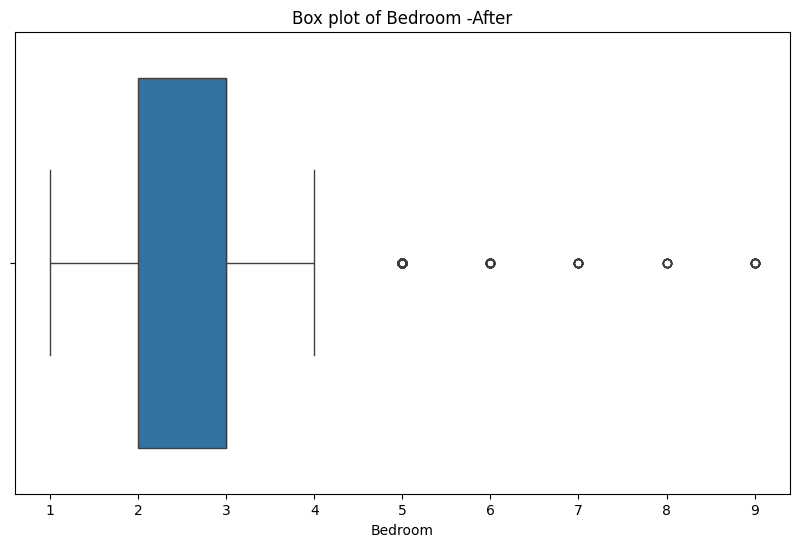

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='bedRoom')
plt.title("Box plot of Bedroom -After")
plt.xlabel("Bedroom")
plt.show()

## Flats Vs Bedroom (Bar plot)

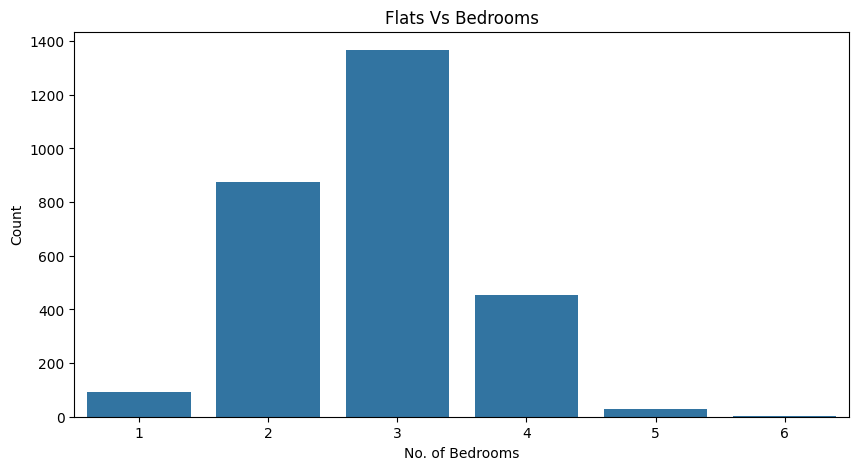

In [ ]:
flats = dataset[dataset['property_type']=='flat']
plt.figure(figsize=(10,5))
sns.countplot(data =flats, x = 'bedRoom')
plt.title("Flats Vs Bedrooms")
plt.xlabel("No. of Bedrooms")
plt.ylabel("Count")
plt.show()

## OBSERVATIONS:
1. HAS 30 OUTLIERS
2. NO MISSING VALUES
3. MAX BEDROOMS ARE 6
4. MAJORITY OF THE FLATS HAVE 5 BEDROOMS

# **9.BATHROOM COLUMN**

## Exploration

In [ ]:
dataset['bathroom'].describe()

count    3169.000000
mean        3.137898
std         1.241987
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [ ]:
dataset['bathroom'].value_counts()

bathroom
3     992
2     989
4     713
5     235
1     112
6      84
7      22
9      13
8       8
12      1
Name: count, dtype: int64

## Binning

In [ ]:
dataset['bathroom_bin'] = pd.cut(dataset['bathroom'], [0, 3, 6, 12])
dataset['bathroom_bin'].value_counts()

bathroom_bin
(0, 3]     2093
(3, 6]     1032
(6, 12]      44
Name: count, dtype: int64

## Bar Plot

<Axes: xlabel='bathroom_bin'>

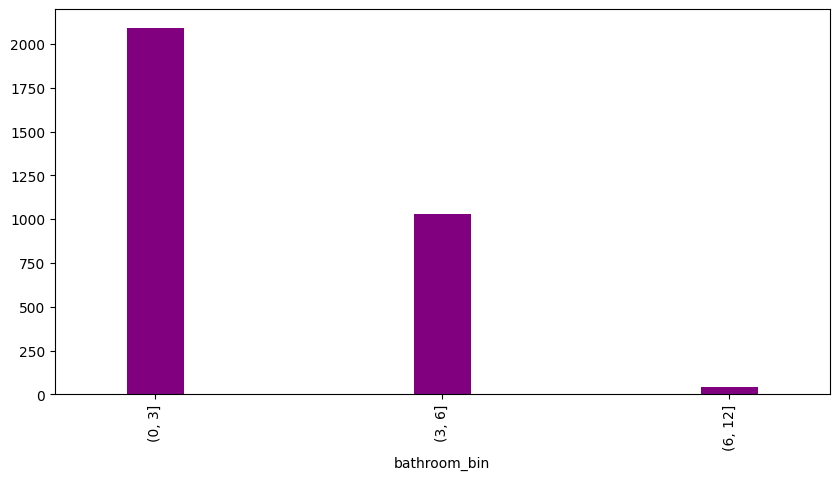

In [ ]:
plt.figure(figsize=(10, 5))
dataset['bathroom_bin'].value_counts().hist(color='purple')
dataset['bathroom_bin'].value_counts().plot(kind='bar',color='purple',width=0.2)

<Axes: ylabel='count'>

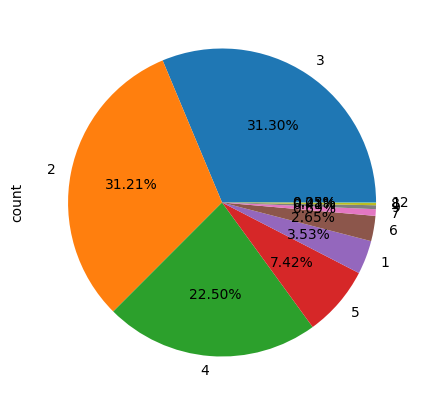

In [ ]:
plt.figure(figsize = (10,5))
dataset['bathroom'].value_counts().plot(kind='pie',autopct='%0.2f%%')

## Box Plot

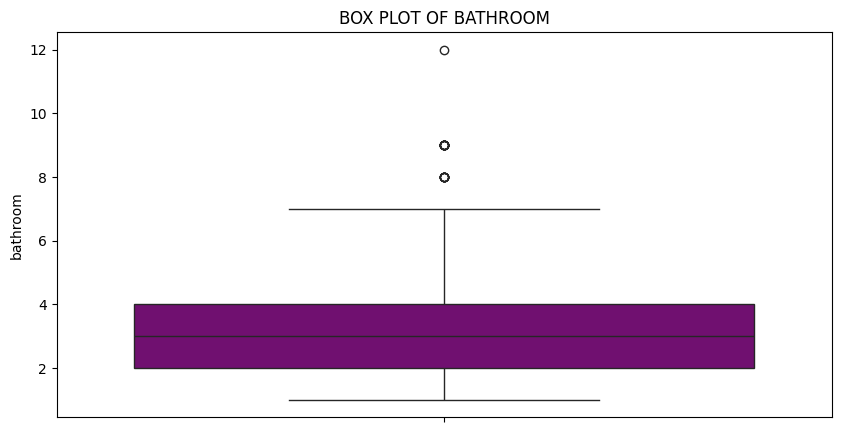

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['bathroom'],color='purple')
plt.title('BOX PLOT OF BATHROOM')
plt.show()

## Price vs Bathroom (Histogram and Box Plot)

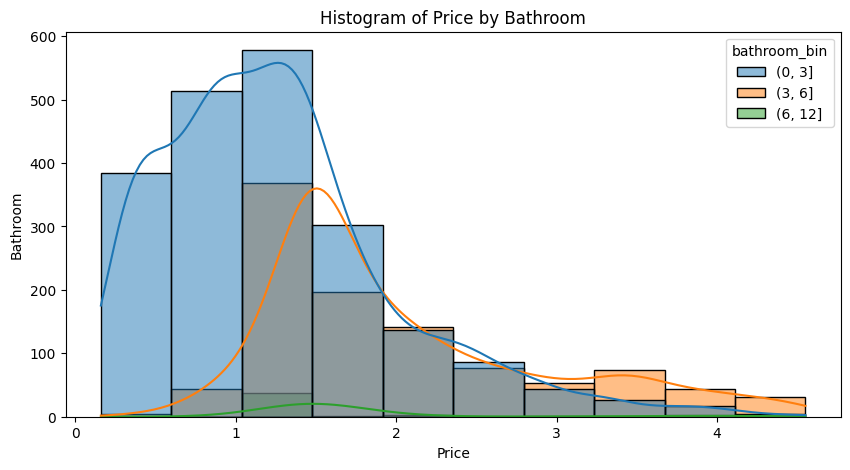

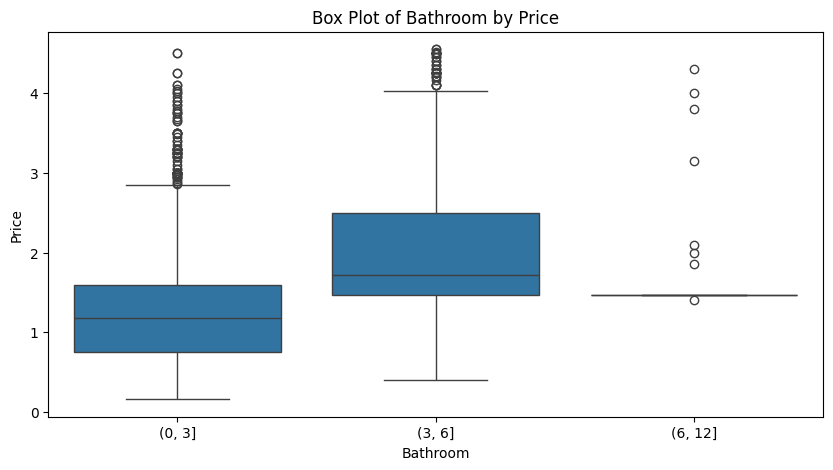

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='bathroom_bin',kde=True, bins=10)
plt.title('Histogram of Price by Bathroom')
plt.xlabel('Price')
plt.ylabel('Bathroom')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='bathroom_bin', y='price')
plt.title('Box Plot of Bathroom by Price')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

## Missing Values

In [ ]:
missing_bathrooms= dataset["bathroom"].isnull().sum()
missing_bathrooms

0

## Outlier Detection

In [ ]:
q1 = dataset['bathroom'].quantile(0.25) # 25th percentile
q3 = dataset['bathroom'].quantile(0.75) #75th percentile
IQR_bathroom = q3-q1 #interquartile range
k = IQR_bathroom*1.5
outliers_bathroom = dataset[(dataset['bathroom']< q1-k )| (dataset['bathroom']>q3+k)]
print("No. of outliers:",len(outliers_bathroom))
#print(outliers_bedroom)
print("IQR:",IQR_bathroom)

No. of outliers: 22
IQR: 2.0


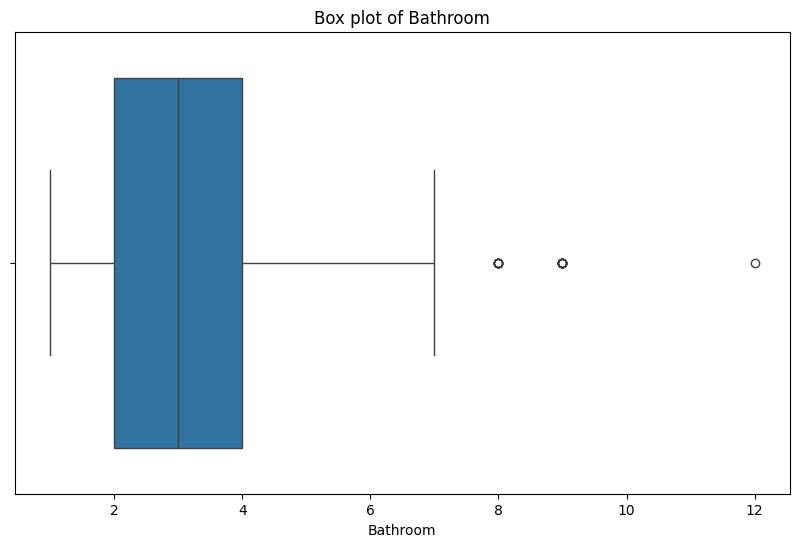

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='bathroom')
plt.title("Box plot of Bathroom")
plt.xlabel("Bathroom")
plt.show()

## Outlier Handling - Trimming

In [ ]:
dataset['bathroom'].describe()

count    3169.000000
mean        3.137898
std         1.241987
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [ ]:
dataset = dataset[dataset['bathroom'] < 10]

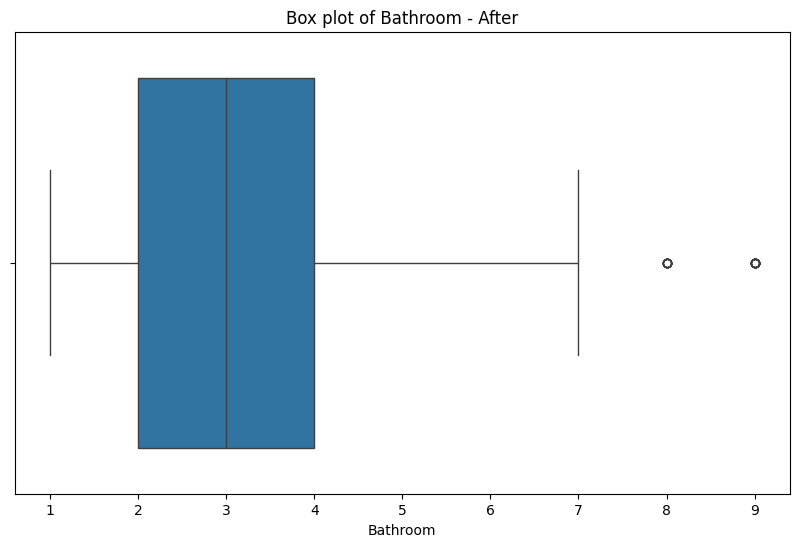

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='bathroom')
plt.title("Box plot of Bathroom - After")
plt.xlabel("Bathroom")
plt.show()

In [ ]:
Q1 = dataset['bathroom'].quantile(0.25)
Q3 = dataset['bathroom'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = dataset[(dataset['bathroom'] < (Q1 - 1.5 * IQR)) | (dataset['bathroom'] > (Q3 + 1.5 * IQR))]
outlier_indices['bathroom'].describe()

count    21.000000
mean      8.619048
std       0.497613
min       8.000000
25%       8.000000
50%       9.000000
75%       9.000000
max       9.000000
Name: bathroom, dtype: float64

## observation:
1. has 65 outliers before handling
2. no missing values
3. max number of bathrooms are 12
4. majority flats have 3 bedrooms

# **10.BALCONY COLUMN**

## Exploration

In [ ]:
dataset['balcony'].describe()
dataset['balcony'].value_counts()

balcony
3     1004
3+     990
2      767
1      302
0      105
Name: count, dtype: int64

## Bar Plot

<Axes: xlabel='balcony'>

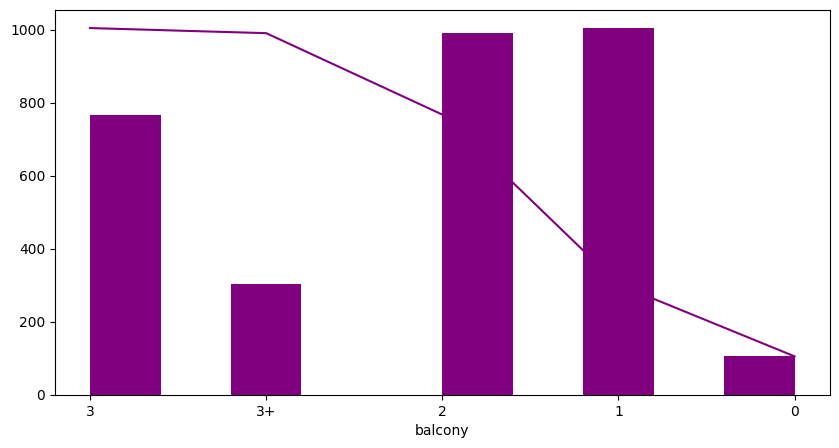

In [ ]:
plt.figure(figsize=(10, 5))
dataset['balcony'].hist(color='purple')
dataset['balcony'].value_counts().plot(color='purple')

## pie chart

<Axes: ylabel='count'>

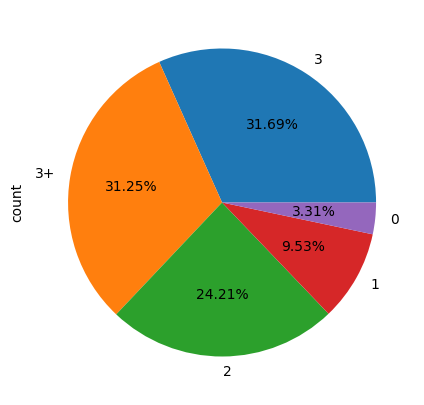

In [ ]:
plt.figure(figsize = (10,5))
dataset['balcony'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## Box Plot

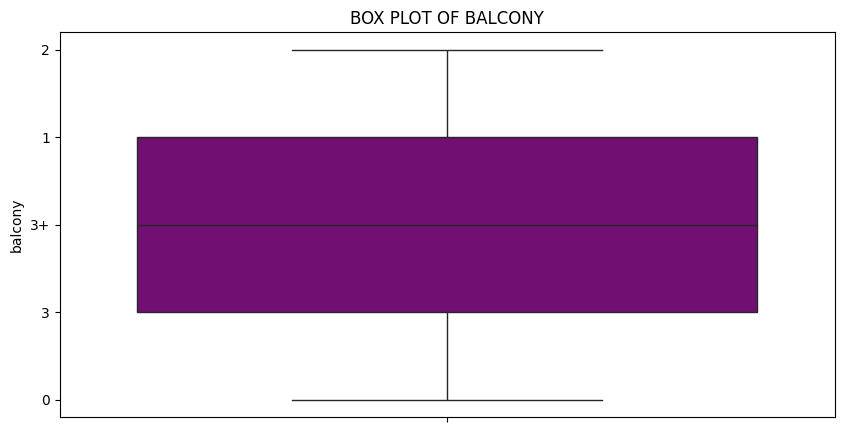

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['balcony'],color='purple')
plt.title('BOX PLOT OF BALCONY')
plt.show()

## Price vs Balcony (Histogram and Box Plot)

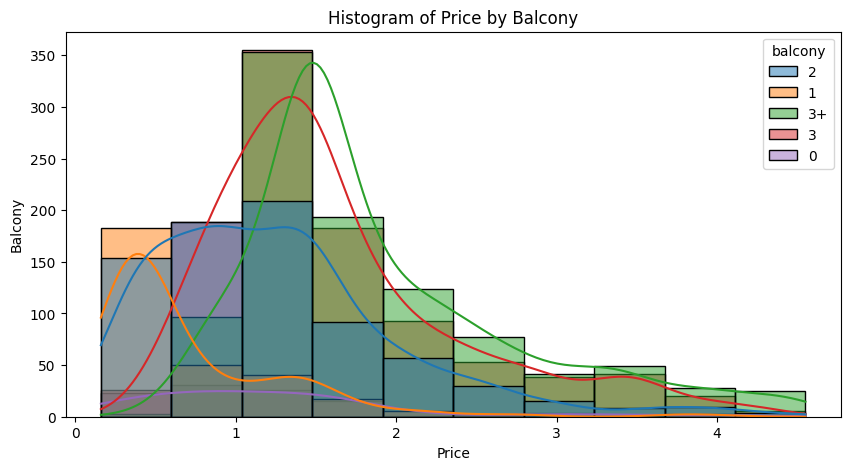

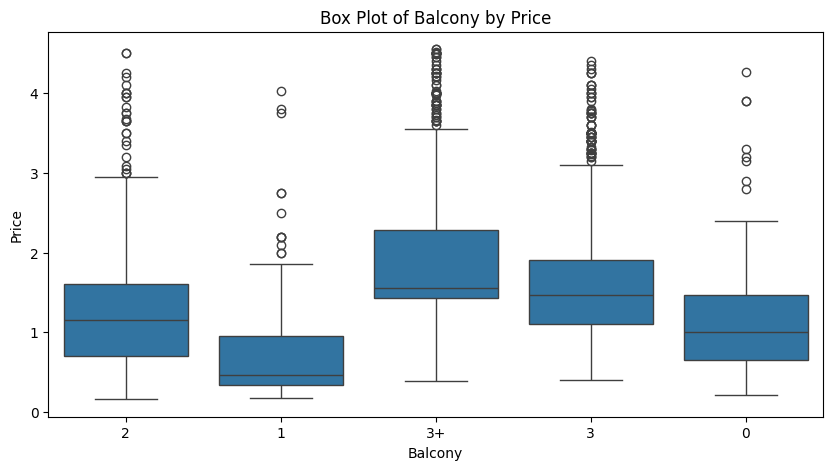

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='balcony', kde=True, bins=10)
plt.title('Histogram of Price by Balcony')
plt.xlabel('Price')
plt.ylabel('Balcony')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='balcony', y='price')
plt.title('Box Plot of Balcony by Price')
plt.xlabel('Balcony')
plt.ylabel('Price')
plt.show()

## Missing Values

In [ ]:
missing_balcony = dataset["balcony"].isnull().sum()
missing_balcony

0

## encoding

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(dataset['balcony'])
dataset['balcony']=label_encoder.transform(dataset['balcony'])

In [ ]:
#Converting categorical to numerical
#balcony_encoded = pd.get_dummies(dataset['balcony'], prefix='balcony')
#dataset = pd.concat([dataset, balcony_encoded], axis=1)
#dataset.head()

## Observations



1.   It is a categorical feature
2.   No missing value



# **11. FLOOR NUMBER COLUMN**

## Exploration

In [ ]:
dataset['floorNum'].value_counts()
dataset['floorNum'].describe()

count    3159.000000
mean        7.476100
std         6.184619
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        51.000000
Name: floorNum, dtype: float64

## Box Plot

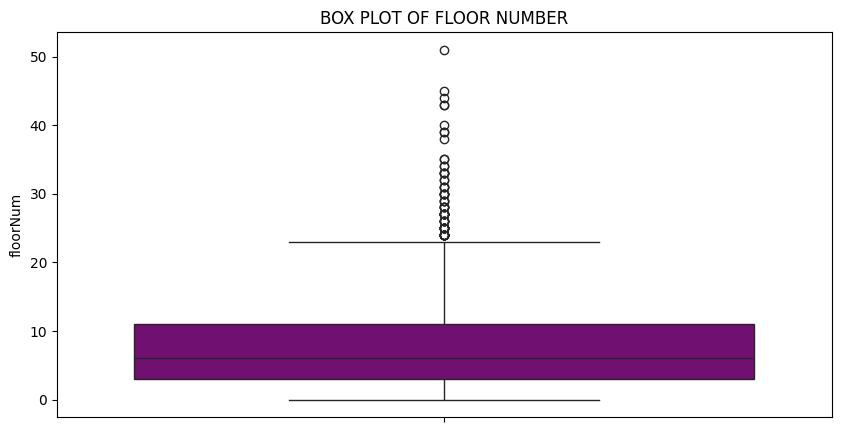

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['floorNum'],color='purple')
plt.title('BOX PLOT OF FLOOR NUMBER')
plt.show()

## Binning

In [ ]:
dataset['floorNum_bin'] = pd.cut(dataset['floorNum'], [0, 10, 30, 50])
dataset['floorNum_bin'].value_counts()

floorNum_bin
(0, 10]     2226
(10, 30]     785
(30, 50]      21
Name: count, dtype: int64

## Bar Plot

<Axes: xlabel='floorNum_bin'>

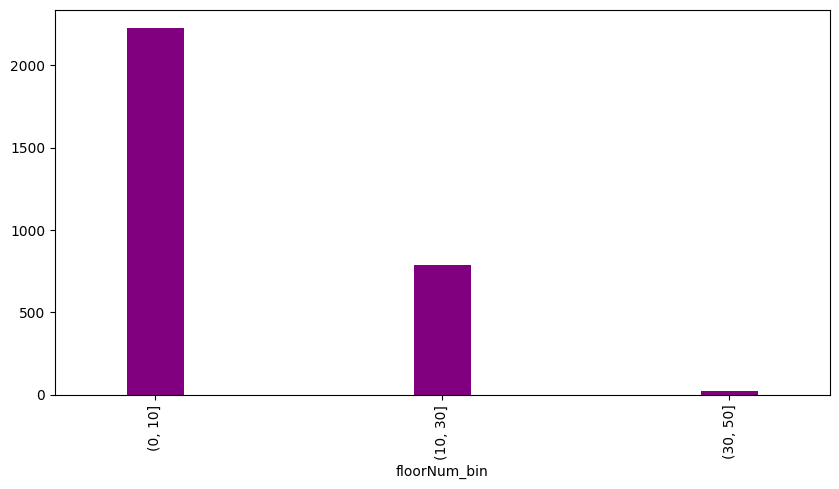

In [ ]:
plt.figure(figsize=(10, 5))
dataset['floorNum_bin'].value_counts().hist(color='purple')
dataset['floorNum_bin'].value_counts().plot(kind='bar',color='purple',width=0.2)

## Price vs Floor Number (Histogram and Box Plot)

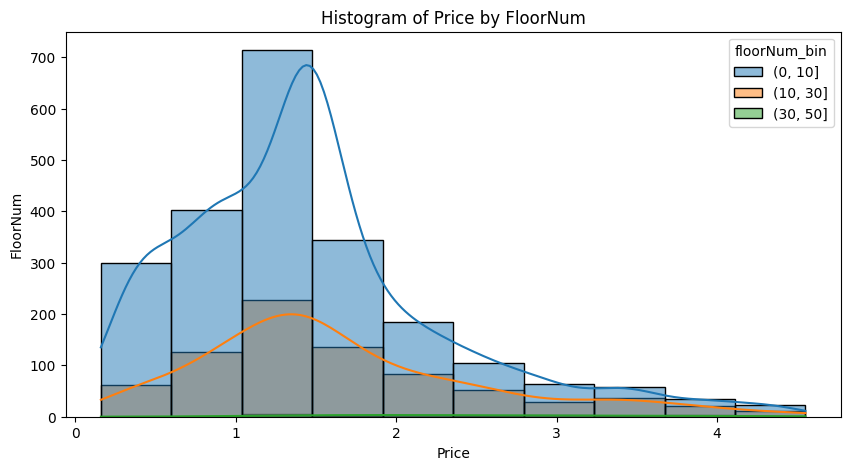

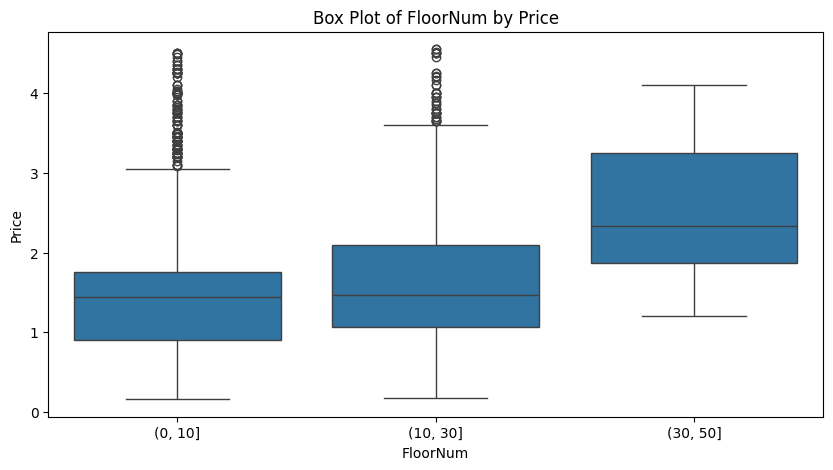

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='floorNum_bin',kde=True,bins=10)
plt.title('Histogram of Price by FloorNum')
plt.xlabel('Price')
plt.ylabel('FloorNum')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='floorNum_bin', y='price')
plt.title('Box Plot of FloorNum by Price')
plt.xlabel('FloorNum')
plt.ylabel('Price')
plt.show()

## Skewness and Kurtosis

In [ ]:
dataset['floorNum'].skew()
dataset['floorNum'].kurtosis()

3.976036541515354

## Missing Values

In [ ]:
missing_floorNum = dataset["floorNum"].isnull().sum()
missing_floorNum

9

## Missing Values Handling

In [ ]:
floornum = dataset['floorNum'].values.reshape(-1, 1)
knn_impute = KNNImputer(n_neighbors = 5)

dataset['floorNum'] = knn_impute.fit_transform(dataset[['floorNum']])

In [ ]:
missing_floorNum = dataset["floorNum"].isnull().sum()
missing_floorNum

0

## Outlier Detection

In [ ]:
q1 = dataset['floorNum'].quantile(0.25) # 25th percentile
q3 = dataset['floorNum'].quantile(0.75) #75th percentile
IQR_floornum = q3-q1 #interquartile range
k = IQR_floornum*1.5
outliers_floornum = dataset[(dataset['floorNum']< q1-k )| (dataset['floorNum']>q3+k)]
print("No. of outliers:",len(outliers_floornum))
print("IQR:",IQR_floornum)

No. of outliers: 67
IQR: 8.0


## Outlier Handling - Trimming

In [ ]:
dataset['floorNum'].describe()

count    3168.000000
mean        7.476100
std         6.175825
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        51.000000
Name: floorNum, dtype: float64

In [ ]:
Q1 = dataset['floorNum'].quantile(0.25)
Q3 = dataset['floorNum'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = dataset[(dataset['floorNum'] < (Q1 - 1.5 * IQR)) | (dataset['floorNum'] > (Q3 + 1.5 * IQR))]
outlier_indices['floorNum'].describe()

count    67.000000
mean     29.746269
std       6.083618
min      24.000000
25%      25.000000
50%      28.000000
75%      32.500000
max      51.000000
Name: floorNum, dtype: float64

In [ ]:
dataset = dataset[dataset['floorNum'] < 30]

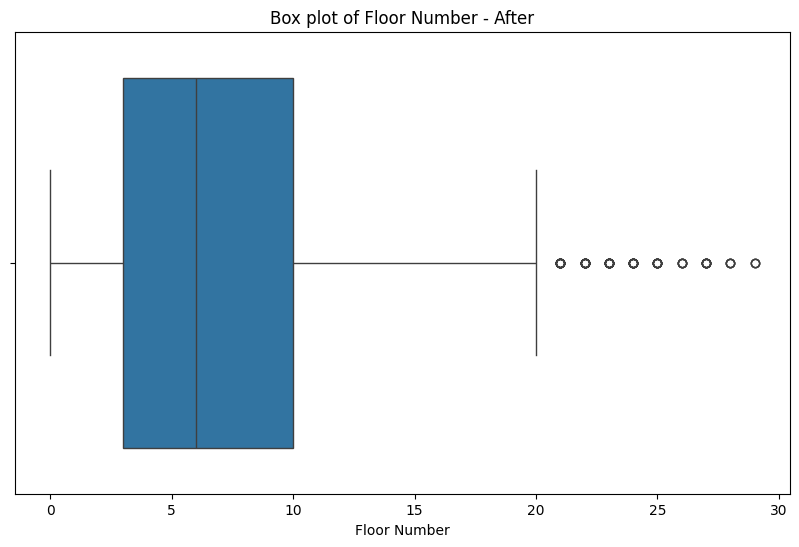

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='floorNum')
plt.title("Box plot of Floor Number - After")
plt.xlabel("Floor Number")
plt.show()

## Observations
1. HAS 0 MISSING VALUES
2. HAS 83 OUTLIERS
3. MAX FLOORS ARE 45

# **12.FACING COLUMN**

## Exploration

In [ ]:
dataset['facing'].describe()
dataset['facing'].value_counts()

facing
North-East    543
East          542
North         327
West          211
South         208
North-West    166
South-East    154
South-West    137
Name: count, dtype: int64

## Bar Plot

<Axes: xlabel='facing'>

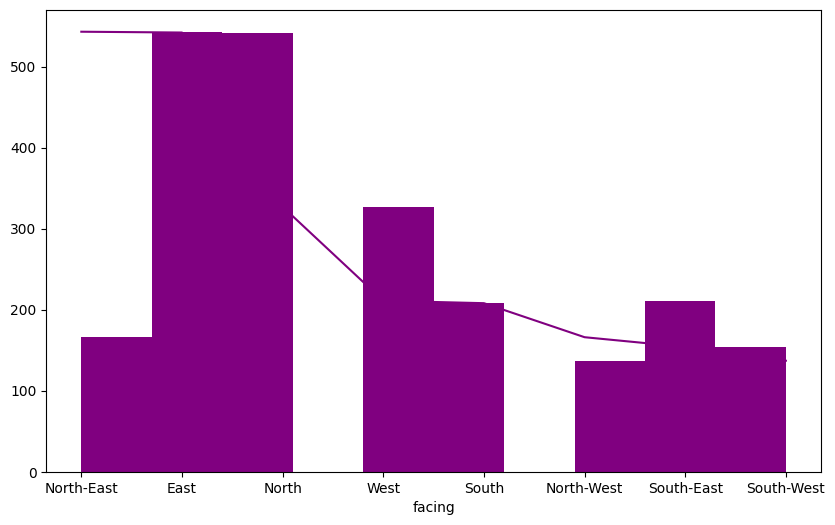

In [ ]:
plt.figure(figsize=(10, 6))
dataset['facing'].hist(color='purple')
dataset['facing'].value_counts().plot(color='purple')

## pie chart

<Axes: ylabel='count'>

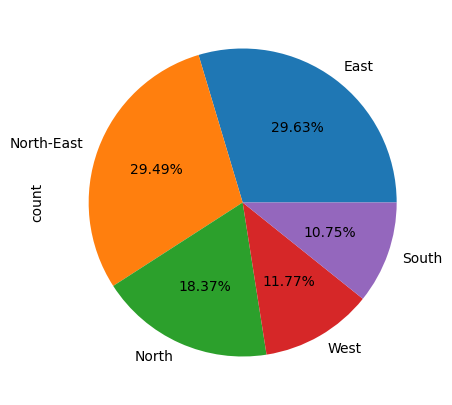

In [ ]:
plt.figure(figsize = (10,5))
df['facing'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## Box Plot

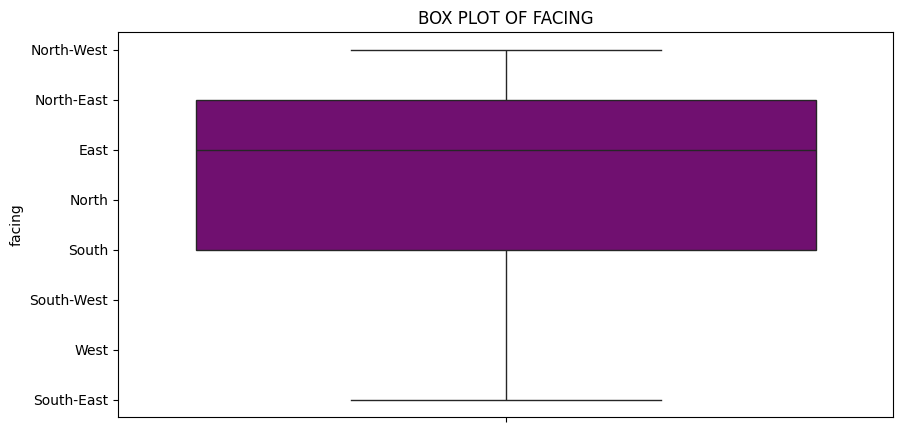

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['facing'],color='purple')
plt.title('BOX PLOT OF FACING')
plt.show()

## Price vs Facing (Histogram and Box Plot)

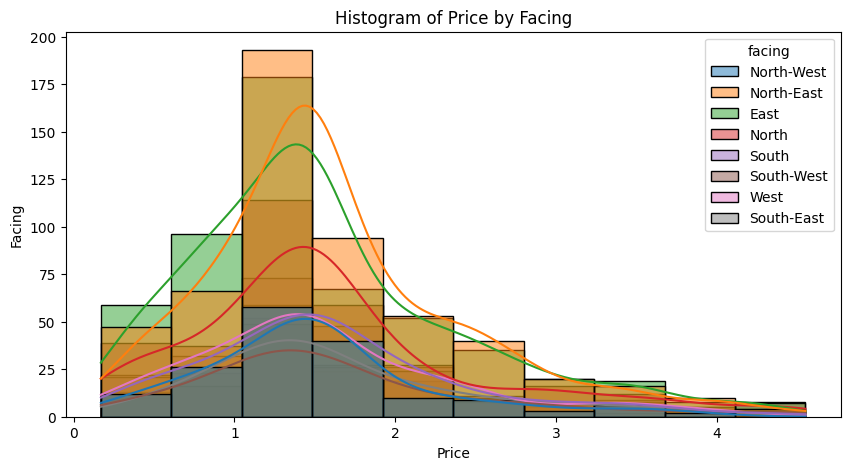

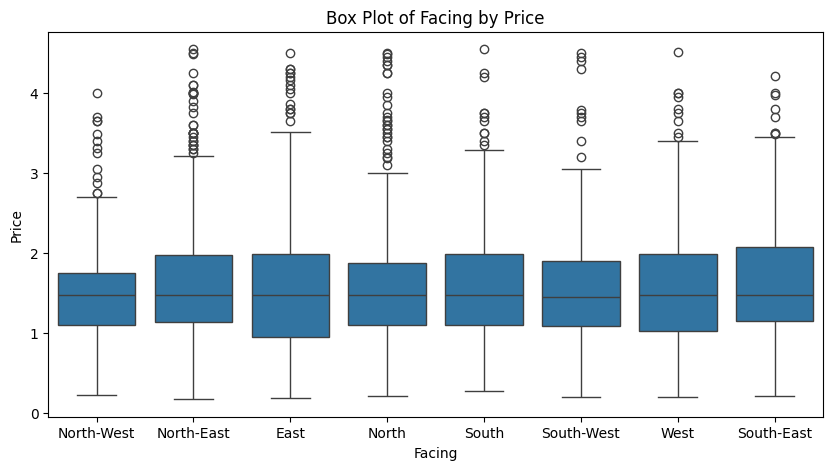

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='facing', kde=True, bins=10)
plt.title('Histogram of Price by Facing')
plt.xlabel('Price')
plt.ylabel('Facing')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='facing', y='price')
plt.title('Box Plot of Facing by Price')
plt.xlabel('Facing')
plt.ylabel('Price')
plt.show()

## Missing Values

In [ ]:
missing_facing = dataset["facing"].isnull().sum()
missing_facing

853

## Missing Values Handling

In [ ]:
facingMode = dataset['facing'].mode()[0]
facingMode
dataset['facing'].fillna(facingMode,inplace=True)
dataset.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                    0
agePossession             0
super_built_up_area    1280
built_up_area          1934
carpet_area            1376
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
society_bins              1
sector_bins               0
price_per_sqft_bin       12
area_bin                 14
bedroom_bin               0
bathroom_bin              0
floorNum_bin            135
dtype: int64

In [ ]:
missing_facing = dataset["facing"].isnull().sum()
missing_facing

0

## encoding

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(dataset['facing'])
dataset['facing']=label_encoder.transform(dataset['facing'])

## outlier detection

In [ ]:
q1 = dataset['facing'].quantile(0.25)
q3 = dataset['facing'].quantile(0.75)
IQR_facing = q3-q1
k = IQR_facing*1.5
outliers_facing = dataset[(dataset['facing']< q1-k )| (dataset['facing']>q3+k)]
print("No. of outliers:",len(outliers_facing))
print("IQR:",IQR_facing)

No. of outliers: 211
IQR: 2.0


## Observations



1.   It is categorical feature
2.   774 MISSING VALUES
3.   MAJORITY OF THE FLATS ARE EAST FACING



# **13.AGE POSSESSION COLUMN**

##Exploration

In [ ]:
dataset['agePossession'].describe()
dataset['agePossession'].value_counts()

agePossession
Relatively New        1536
New Property           532
Moderately Old         435
Under Construction     254
Undefined              206
Old Property           178
Name: count, dtype: int64

## Bar Plot

<Axes: xlabel='agePossession'>

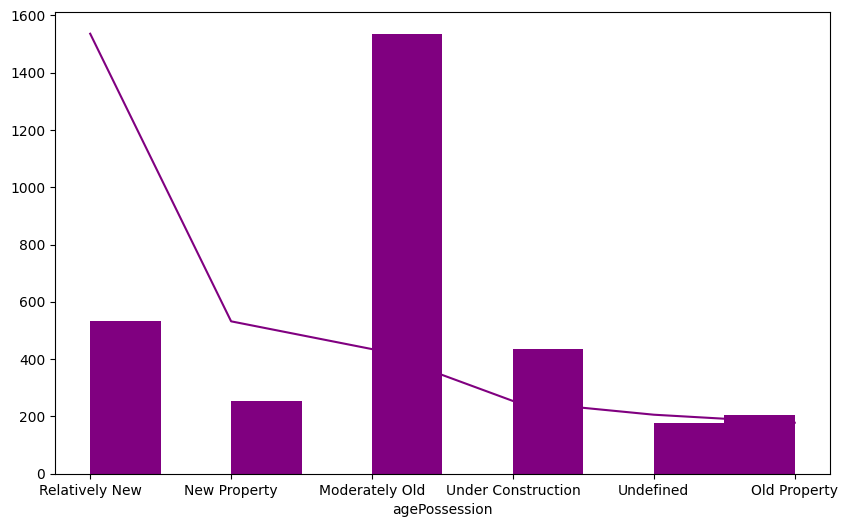

In [ ]:
plt.figure(figsize=(10, 6))
dataset['agePossession'].hist(color='purple')
dataset['agePossession'].value_counts().plot(color='purple')

## pie chart

<Axes: ylabel='count'>

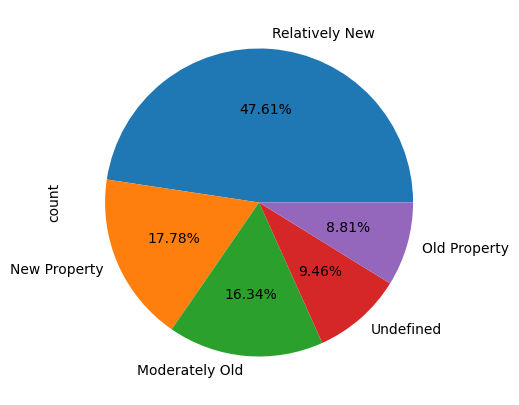

In [ ]:
plt.figure(figsize = (10,5))
df['agePossession'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## Box Plot

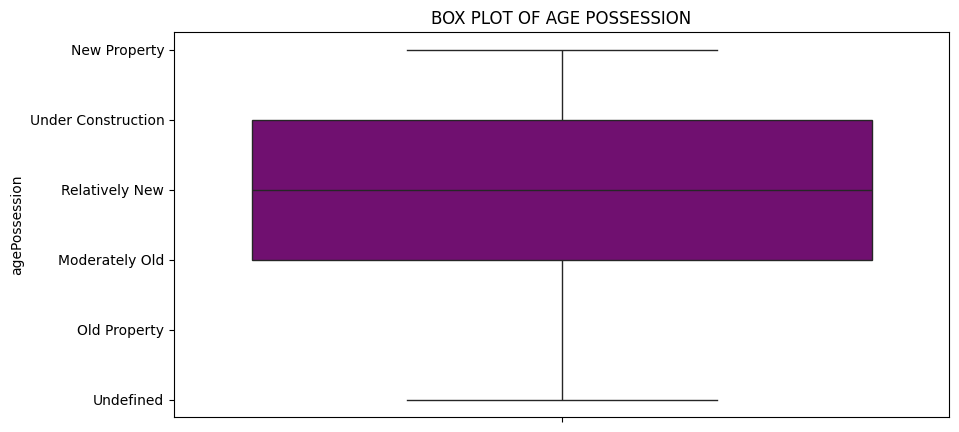

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['agePossession'],color='purple')
plt.title('BOX PLOT OF AGE POSSESSION')
plt.show()

## Price vs Age Possession (Histogram and Box Plot)

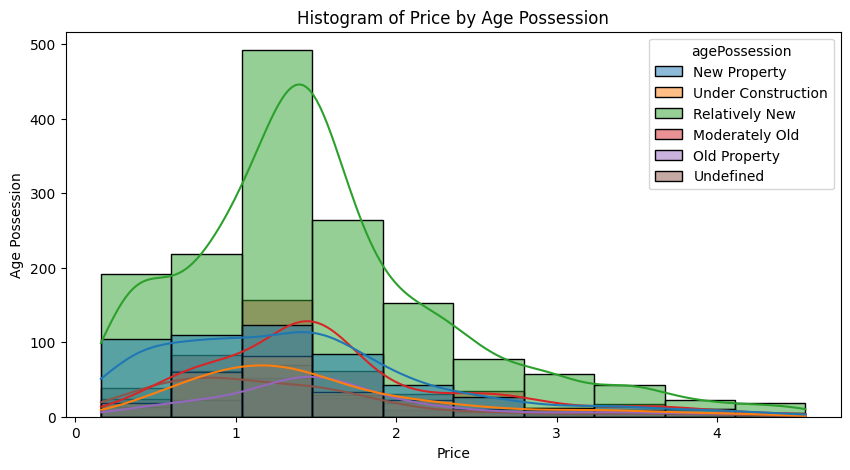

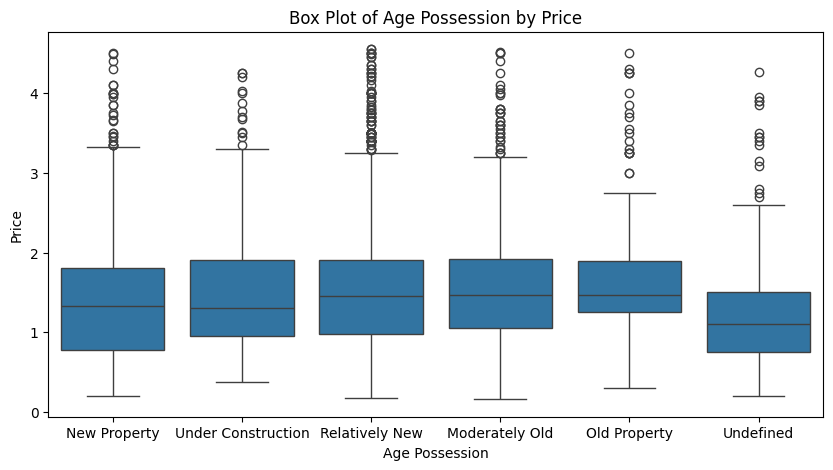

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='agePossession', kde=True, bins=10)
plt.title('Histogram of Price by Age Possession')
plt.xlabel('Price')
plt.ylabel('Age Possession')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='agePossession', y='price')
plt.title('Box Plot of Age Possession by Price')
plt.xlabel('Age Possession')
plt.ylabel('Price')
plt.show()

## Missing Values

In [ ]:
missing_agepossession = dataset["agePossession"].isnull().sum()
missing_agepossession

0

## encoding

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(dataset['agePossession'])
dataset['agePossession']=label_encoder.transform(dataset['agePossession'])

## outlier detection

In [ ]:
q1 = dataset['agePossession'].quantile(0.25)
q3 = dataset['agePossession'].quantile(0.75)
IQR_agePossession = q3-q1
k = IQR_agePossession*1.5
outliers_agePossession = dataset[(dataset['agePossession']< q1-k )| (dataset['agePossession']>q3+k)]
print("No. of outliers:",len(outliers_agePossession))
print("IQR:",IQR_agePossession)

No. of outliers: 0
IQR: 2.0


## Observation



1. It is a categorical feature
2. NO MISSING VALUES



# **14. BUILT UP AREA COLUMN**

###Exploration

In [ ]:
dataset['built_up_area'].describe()

count      1207.000000
mean       2565.742974
std       21202.518775
min          30.000000
25%        1210.361736
50%        1690.000000
75%        2287.500000
max      737147.000000
Name: built_up_area, dtype: float64

In [ ]:
dataset['built_up_area'].skew()
dataset['built_up_area'].kurtosis()

1197.660543139365

## binning

In [ ]:
#dataset['built_up_area'] = pd.cut(dataset['built_up_area'], [0, 1000, 3000, 800000])
#dataset['built_up_area'].value_counts()

##price vs built up area

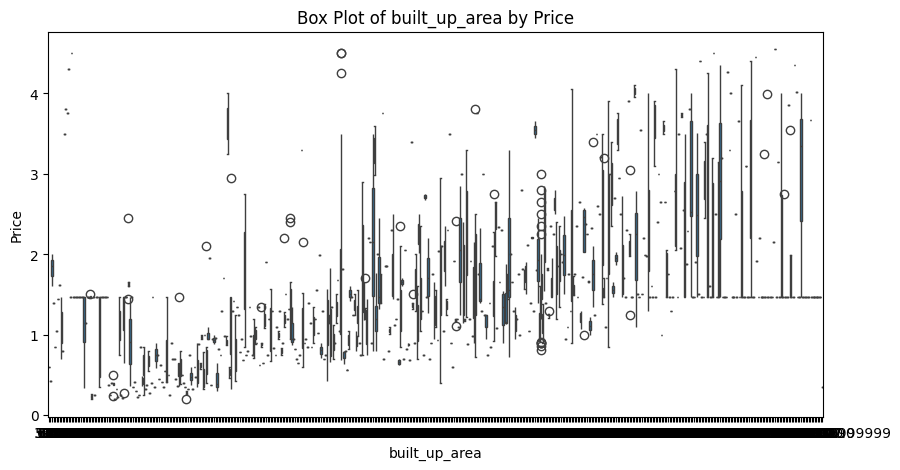

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='built_up_area', y='price')
plt.title('Box Plot of built_up_area by Price')
plt.xlabel('built_up_area')
plt.ylabel('Price')
plt.show()

## Missing values

In [ ]:
missing_built_up_area= dataset["built_up_area"].isnull().sum()
missing_built_up_area

1934

## handling missing values

In [ ]:
missing = ['super_built_up_area','carpet_area','built_up_area']
a = 0
b = 0
matrix = np.zeros((3, 3))
for i in missing:
    for j in missing:
        ratio_mean = (dataset[i] / dataset[j]).median()
        matrix[a, b] = ratio_mean
        b += 1
    a += 1
    b = 0

matrix


array([[1.        , 1.30097087, 1.11186441],
       [0.76865672, 1.        , 0.88994565],
       [0.89939024, 1.12366412, 1.        ]])

In [ ]:
for i in ['built_up_area']:
    missing_area_type = dataset[i].isnull()
    if missing_area_type.any():
        dataset.loc[missing_area_type, i] = dataset.loc[missing_area_type ,'super_built_up_area'] * matrix[1,0]

for i in ['built_up_area']:
    missing_area_type = dataset[i].isnull()
    if missing_area_type.any():
        dataset.loc[missing_area_type, i] = dataset.loc[missing_area_type ,'carpet_area'] * matrix[1,2]

## box plot

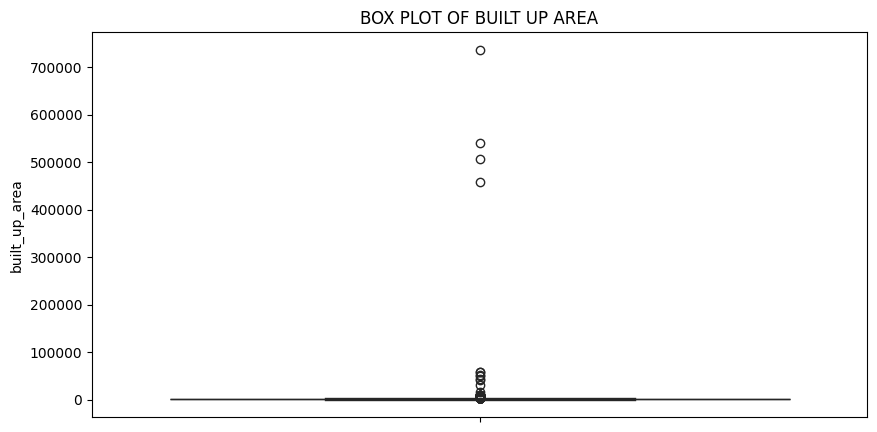

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['built_up_area'],color='purple')
plt.title('BOX PLOT OF BUILT UP AREA')
plt.show()

## outlier detection

In [ ]:
q1 = dataset['built_up_area'].quantile(0.25)
q3 = dataset['built_up_area'].quantile(0.75)
IQR_built_up_area = q3-q1
k = IQR_built_up_area*1.5
outliers_built_up_area = dataset[(dataset['built_up_area']< q1-k )| (dataset['built_up_area']>q3+k)]
print("No. of outliers:",len(outliers_built_up_area))
print("IQR:",IQR_built_up_area)

No. of outliers: 216
IQR: 850.0


## outliers handling

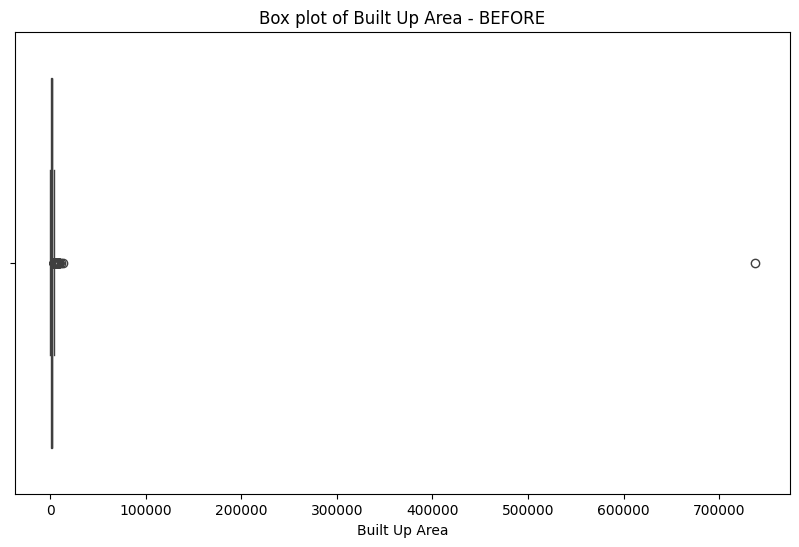

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='built_up_area')
plt.title("Box plot of Built Up Area - BEFORE")
plt.xlabel("Built Up Area")
plt.show()

In [ ]:
Q1 = dataset['built_up_area'].quantile(0.25)
Q3 = dataset['built_up_area'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['built_up_area'] < (Q1 - 1.5 * IQR)) | (dataset['built_up_area'] > (Q3 + 1.5 * IQR))

IQR
dataset['built_up_area'] = np.where(outlier_indices, dataset['built_up_area'].median(), dataset['built_up_area'])

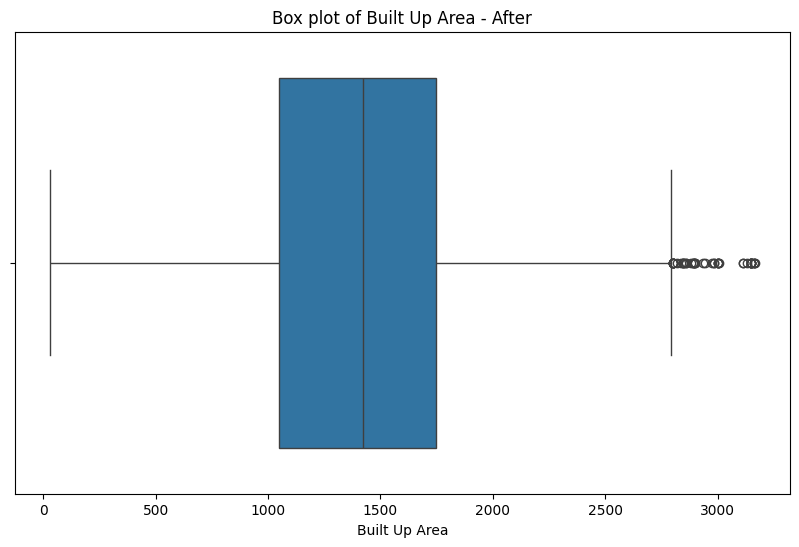

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='built_up_area')
plt.title("Box plot of Built Up Area - After")
plt.xlabel("Built Up Area")
plt.show()

## observation:
1. HAS 1916 MISSING VALUES
2. HAS 109 OUTLIERS
3. IT IS A NUMERICAL FEATURE



# **15. SUPER BUILT UP AREA COLUMN**

## exploration

In [ ]:
dataset['super_built_up_area'].describe()

count     1861.000000
mean      1924.481725
std        764.629618
min         89.000000
25%       1480.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [ ]:
dataset['super_built_up_area'].skew()

1.8444556890445762

In [ ]:

dataset['super_built_up_area'].kurtosis()

10.41325761639412

## missing values

In [ ]:
missing_super_built_up_area= dataset["super_built_up_area"].isnull().sum()
missing_super_built_up_area

1280

## handling missing vales

In [ ]:
for i in ['super_built_up_area']:
    missing_area_type = dataset[i].isnull()
    if missing_area_type.any():
        dataset.loc[missing_area_type, i] = dataset.loc[missing_area_type ,'built_up_area'] * matrix[0,1]

## box plot

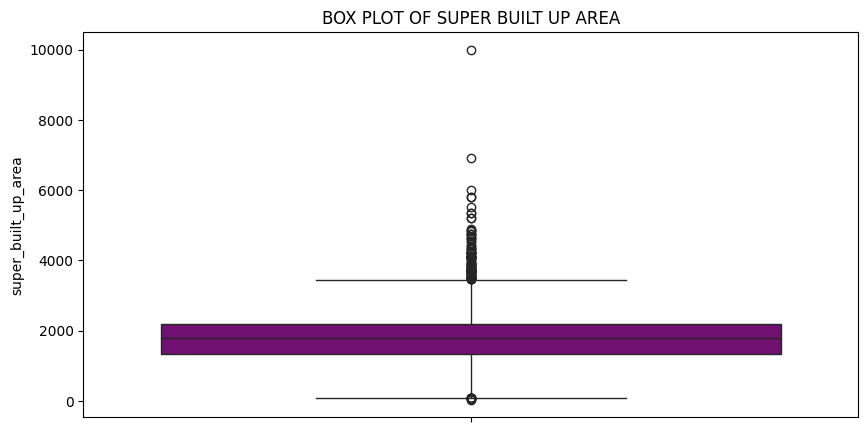

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['super_built_up_area'],color='purple')
plt.title('BOX PLOT OF SUPER BUILT UP AREA')
plt.show()

## outlier detection

In [ ]:
q1 = dataset['super_built_up_area'].quantile(0.25) # 25th percentile
q3 = dataset['super_built_up_area'].quantile(0.75) #75th percentile
IQR_super_built_up_area = q3-q1 #interquartile range
k = IQR_super_built_up_area*1.5
outliers_super_built_up_area = dataset[(dataset['super_built_up_area']< q1-k )| (dataset['super_built_up_area']>q3+k)]
print("No. of outliers:",len(outliers_super_built_up_area))
print("IQR:",IQR_super_built_up_area)

No. of outliers: 119
IQR: 839.0


## outliers handling

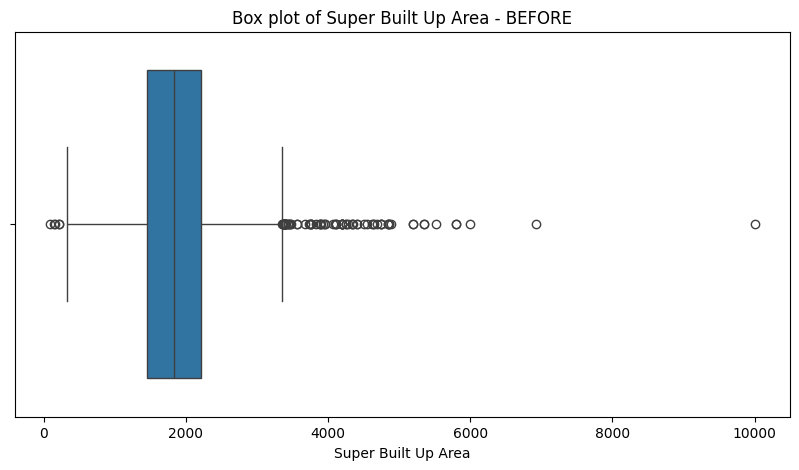

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='super_built_up_area')
plt.title("Box plot of Super Built Up Area - BEFORE")
plt.xlabel("Super Built Up Area")
plt.show()

In [ ]:
Q1 = dataset['super_built_up_area'].quantile(0.25)
Q3 = dataset['super_built_up_area'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['super_built_up_area'] < (Q1 - 1.5 * IQR)) | (dataset['super_built_up_area'] > (Q3 + 1.5 * IQR))

IQR
dataset['super_built_up_area'] = np.where(outlier_indices, dataset['super_built_up_area'].median(), dataset['super_built_up_area'])

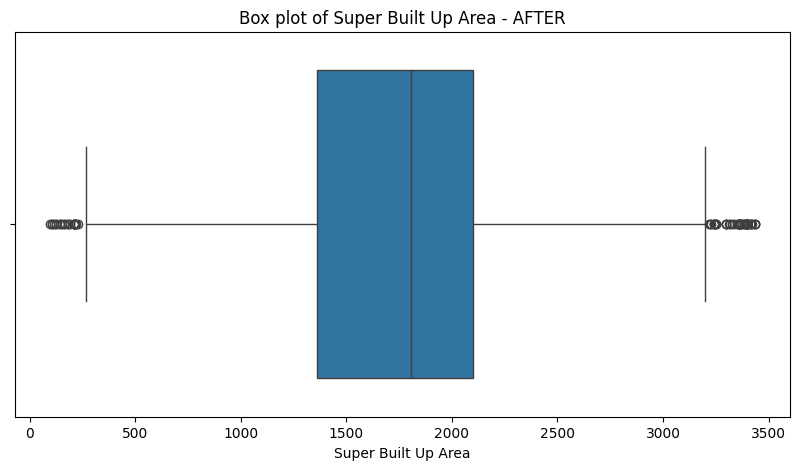

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='super_built_up_area')
plt.title("Box plot of Super Built Up Area - AFTER")
plt.xlabel("Super Built Up Area")
plt.show()

## observation
1. 932 MISSING VALUES
2. 89 OUTLIERS
3. NUMERICAL FEATURE

# **16. CARPET AREA COLUMN**

## exploration

In [ ]:
dataset['carpet_area'].describe()

count      1765.000000
mean       2584.845920
std       23473.833332
min          15.000000
25%         863.910000
50%        1300.000000
75%        1762.000000
max      607936.000000
Name: carpet_area, dtype: float64

In [ ]:
dataset['carpet_area'].skew()

23.64365458095465

In [ ]:

dataset['carpet_area'].kurtosis()

570.3938592764292

## missing values

In [ ]:
missing_carpet_area= dataset["carpet_area"].isnull().sum()
missing_carpet_area

1376

## handling missing values

In [ ]:
for i in ['carpet_area']:
    missing_area_type = dataset[i].isnull()
    if missing_area_type.any():
        dataset.loc[missing_area_type, i] = dataset.loc[missing_area_type ,'built_up_area'] * matrix[2,1]

## box plot

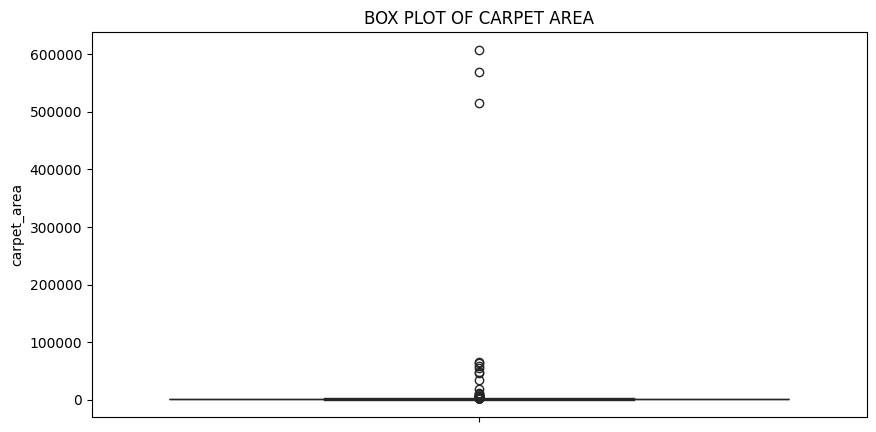

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['carpet_area'],color='purple')
plt.title('BOX PLOT OF CARPET AREA')
plt.show()

## outlier detection

In [ ]:
q1 = dataset['carpet_area'].quantile(0.25) # 25th percentile
q3 = dataset['carpet_area'].quantile(0.75) #75th percentile
IQR_carpet_area = q3-q1 #interquartile range
k = IQR_carpet_area*1.5
outliers_carpet_area = dataset[(dataset['carpet_area']< q1-k )| (dataset['carpet_area']>q3+k)]
print("No. of outliers:",len(outliers_carpet_area))
print("IQR:",IQR_carpet_area)

No. of outliers: 118
IQR: 771.4779457673465


## outlier handling

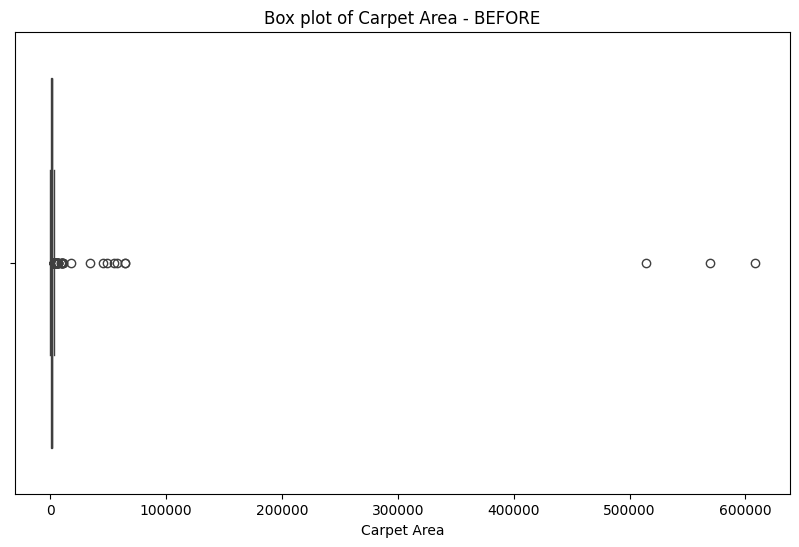

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carpet_area')
plt.title("Box plot of Carpet Area - BEFORE")
plt.xlabel("Carpet Area")
plt.show()

In [ ]:
Q1 = dataset['carpet_area'].quantile(0.25)
Q3 = dataset['carpet_area'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['carpet_area'] < (Q1 - 1.5 * IQR)) | (dataset['carpet_area'] > (Q3 + 1.5 * IQR))

IQR
dataset['carpet_area'] = np.where(outlier_indices, dataset['carpet_area'].median(), dataset['carpet_area'])


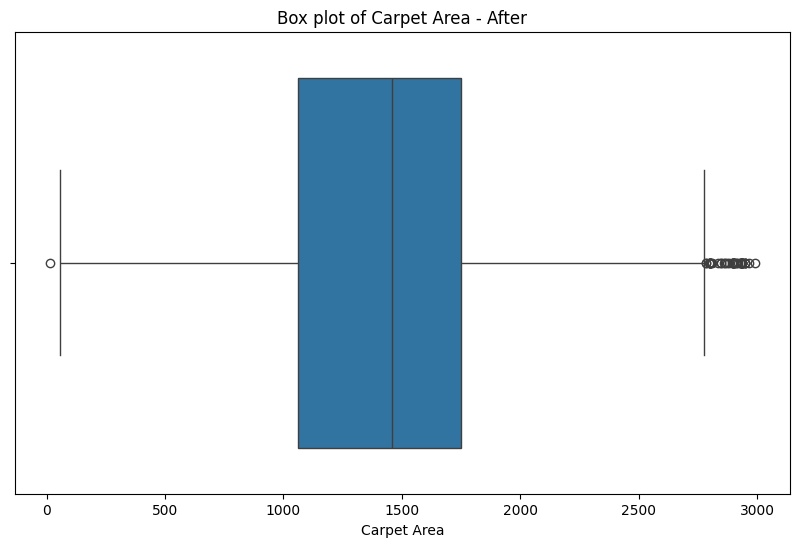

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='carpet_area')
plt.title("Box plot of Carpet Area - After")
plt.xlabel("Carpet Area")
plt.show()

## observation:
1. 1098 MISSING VALUES
2. 84 OUTLIERS
3. NUMERIAL FEATURE

# **17. STUDY ROOM**

## exploration

In [ ]:
dataset['study room'].value_counts()

study room
0    2555
1     586
Name: count, dtype: int64

## bar plot

<Axes: xlabel='study room'>

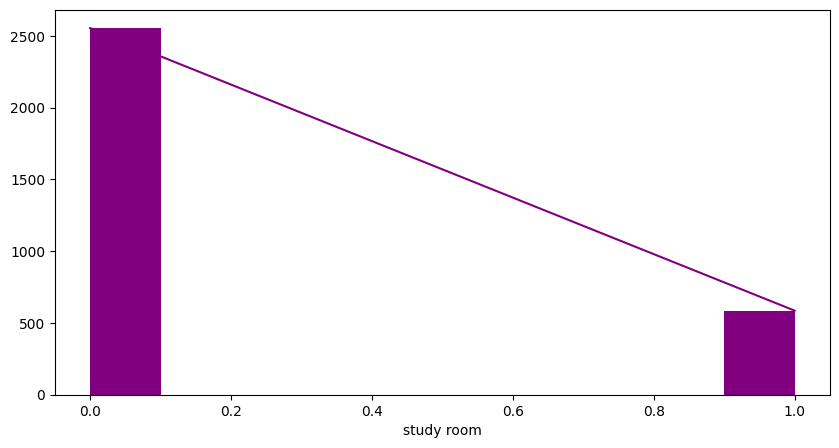

In [ ]:
plt.figure(figsize=(10, 5))
dataset['study room'].hist(color='purple')
dataset['study room'].value_counts().plot(color='purple')

## pie chart

<Axes: ylabel='count'>

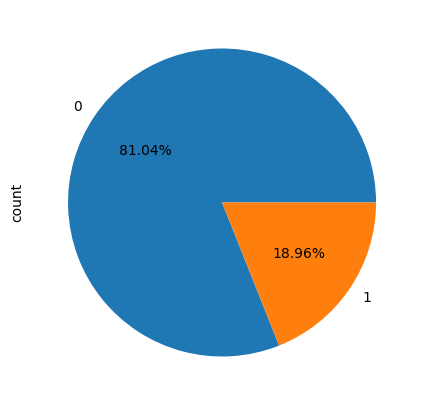

In [ ]:
plt.figure(figsize = (10,5))
df['study room'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## box plot

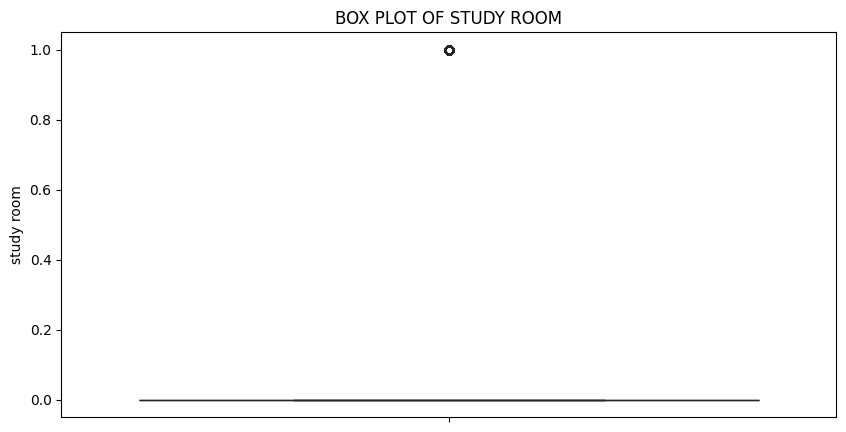

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['study room'],color='purple')
plt.title('BOX PLOT OF STUDY ROOM')
plt.show()

## study room vs price graph

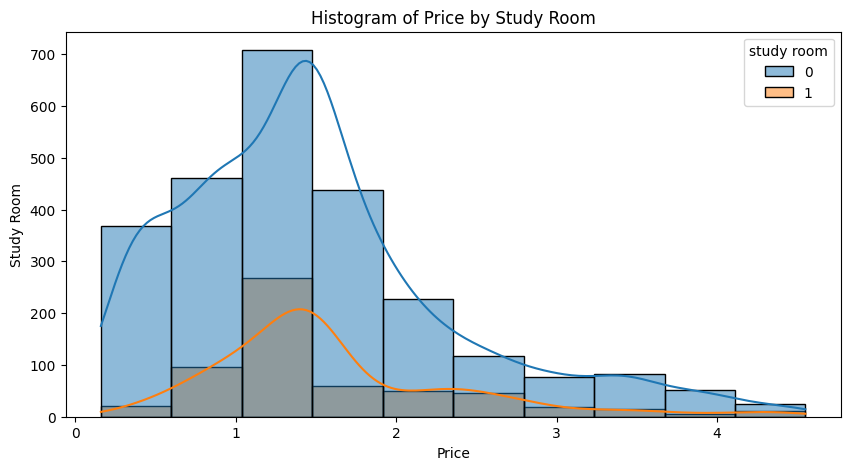

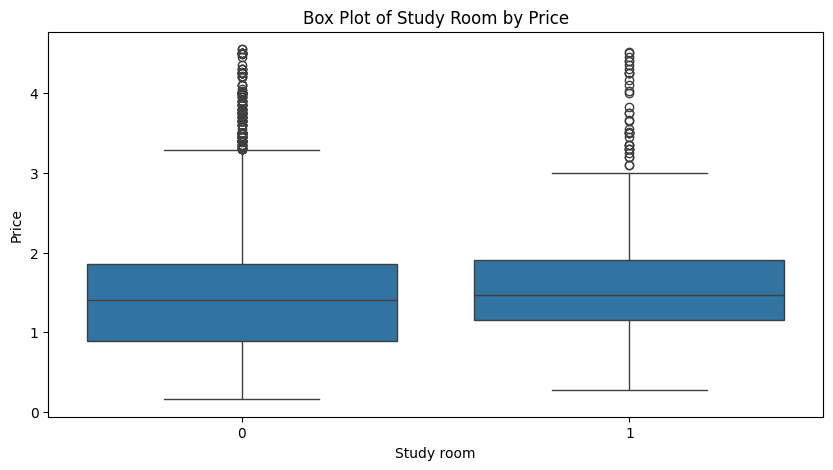

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='study room',kde=True, bins=10)
plt.title('Histogram of Price by Study Room')
plt.xlabel('Price')
plt.ylabel('Study Room')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='study room', y='price')
plt.title('Box Plot of Study Room by Price')
plt.xlabel('Study room')
plt.ylabel('Price')
plt.show()

## missing values

In [ ]:
missing_study_room= dataset["study room"].isnull().sum()
missing_study_room

0

## outliers detection

In [ ]:
q1 = dataset['study room'].quantile(0.25) # 25th percentile
q3 = dataset['study room'].quantile(0.75) #75th percentile
IQR_study_room = q3-q1 #interquartile range
k = IQR_study_room*1.5
outliers_study_room = dataset[(dataset['study room']< q1-k )| (dataset['study room']>q3+k)]
print("No. of outliers:",len(outliers_study_room))
print("IQR:",IQR_study_room)

No. of outliers: 586
IQR: 0.0


## outlier handling
no outllier handlong as it is a binary column

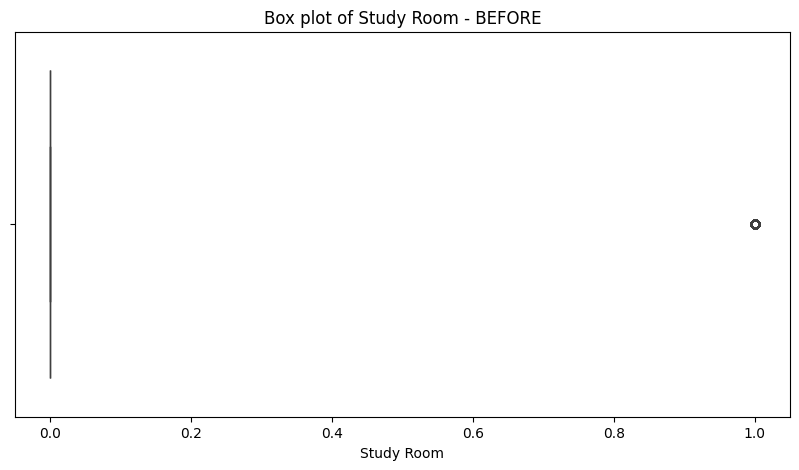

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='study room')
plt.title("Box plot of Study Room - BEFORE")
plt.xlabel("Study Room")
plt.show()

In [ ]:
#dataset = dataset[dataset['study room'] < 1]

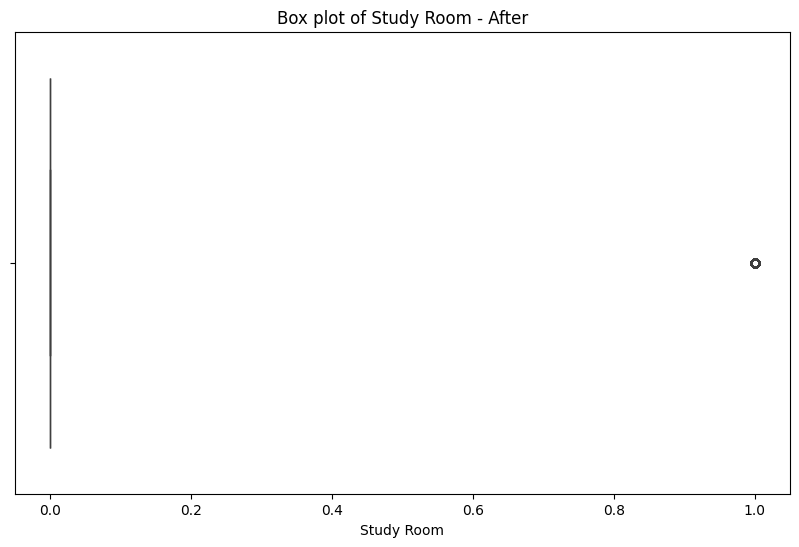

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='study room')
plt.title("Box plot of Study Room - After")
plt.xlabel("Study Room")
plt.show()

## observation:
1. MOST FLATS HAD NO STUDY ROOMS
2. NUMERICAL FEATURE
3. NO MISSING VALUES AND 586 OUTLIERS

# **18. SERVANT ROOM**

## exploration

In [ ]:
dataset['servant room'].value_counts()

servant room
0    1994
1    1147
Name: count, dtype: int64

## bar plot

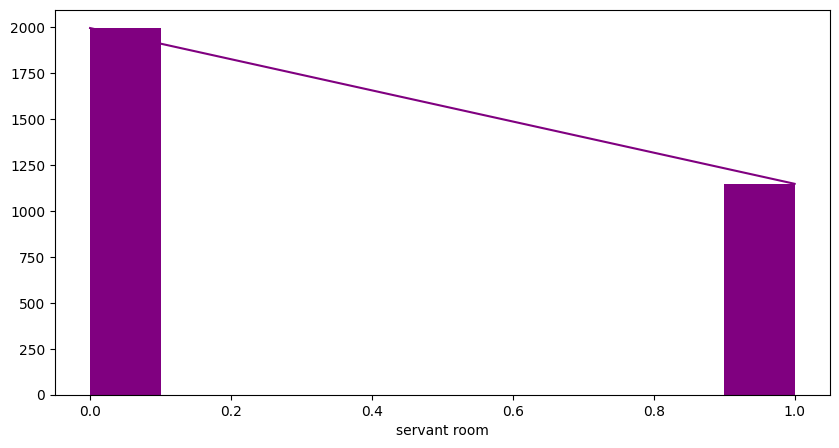

In [ ]:
plt.figure(figsize=(10, 5))
dataset['servant room'].hist(color='purple')
dataset['servant room'].value_counts().plot(color='purple')
plt.show()

## pie chart

<Axes: ylabel='count'>

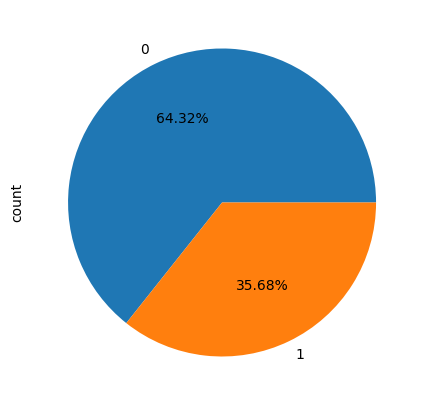

In [ ]:
plt.figure(figsize = (10,5))
df['servant room'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## servant room vs price graphs

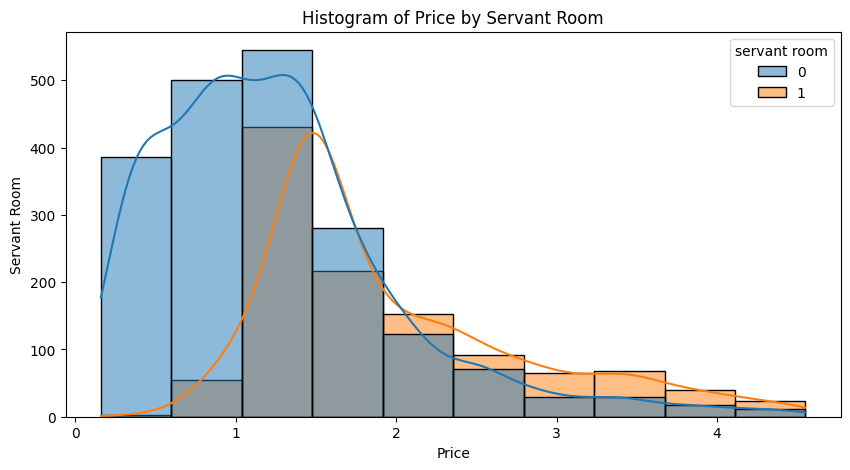

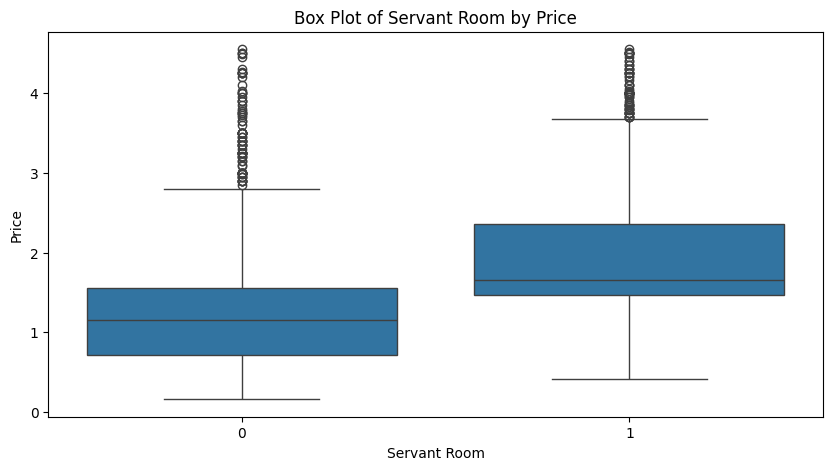

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='servant room', kde=True,bins=10)
plt.title('Histogram of Price by Servant Room')
plt.xlabel('Price')
plt.ylabel('Servant Room')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='servant room', y='price')
plt.title('Box Plot of Servant Room by Price')
plt.xlabel('Servant Room')
plt.ylabel('Price')
plt.show()

## missing values

In [ ]:
missing_servant_room= dataset["servant room"].isnull().sum()
missing_servant_room

0

## outliers detection

In [ ]:
q1 = dataset['servant room'].quantile(0.25) # 25th percentile
q3 = dataset['servant room'].quantile(0.75) #75th percentile
IQR_servant_room = q3-q1 #interquartile range
k = IQR_servant_room*1.5
outliers_servant_room = dataset[(dataset['servant room']< q1-k )| (dataset['servant room']>q3+k)]
print("No. of outliers:",len(outliers_servant_room))
print("IQR:",IQR_servant_room)

No. of outliers: 0
IQR: 1.0


## observation:
1. MAJORITY FLATS HAVE NO SERVANT ROOM
2. NO OUTLIERS AND MISSING VALUES
3. NUMERICAL FEATURE

# **19. POOJA ROOM**

## exploration

In [ ]:
dataset['pooja room'].value_counts()

pooja room
0    2647
1     494
Name: count, dtype: int64

## bar plot

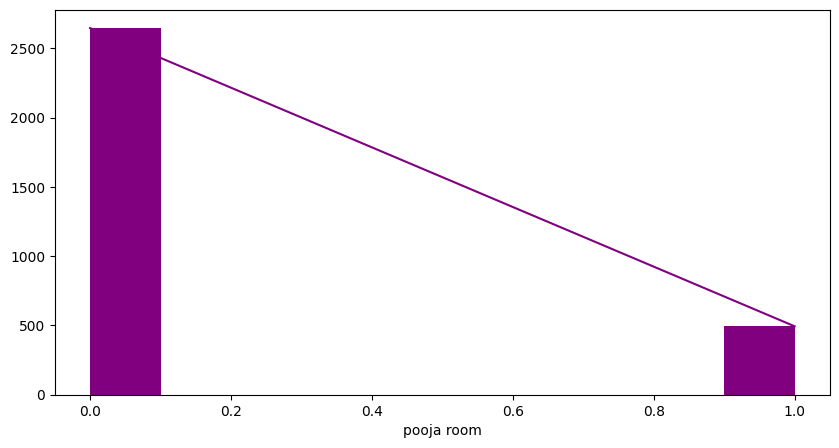

In [ ]:
plt.figure(figsize=(10, 5))
dataset['pooja room'].hist(color='purple')
dataset['pooja room'].value_counts().plot(color='purple')
plt.show()

## pie chart

<Axes: ylabel='count'>

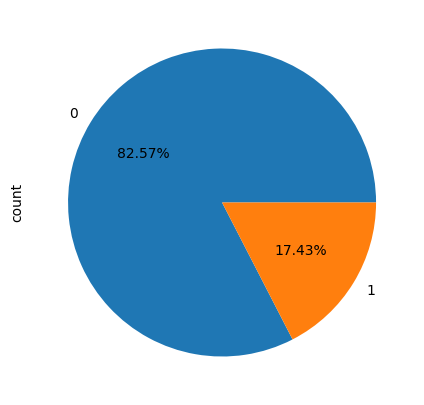

In [ ]:
plt.figure(figsize = (10,5))
df['pooja room'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## pooja room vs price graph

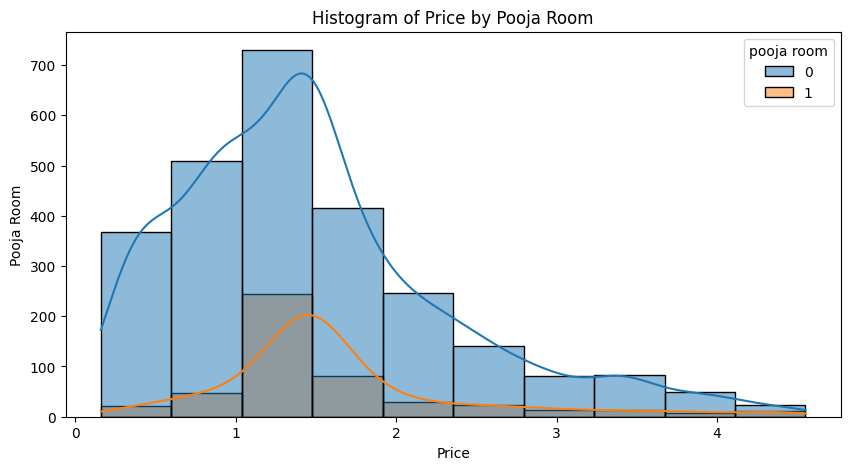

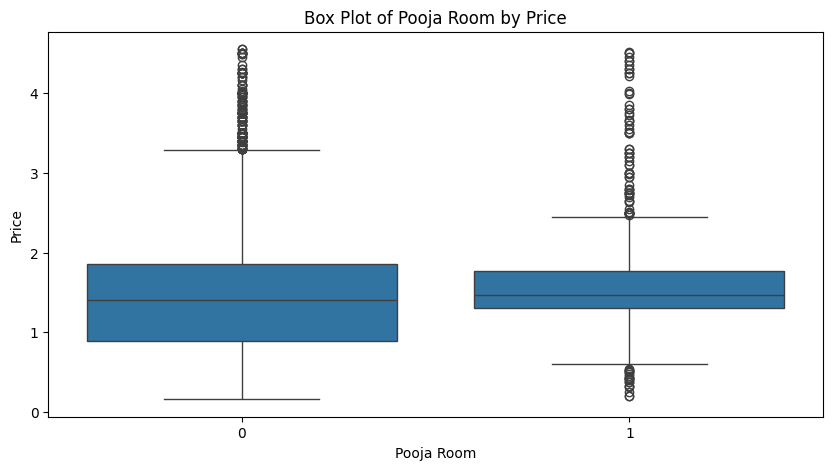

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='pooja room',kde=True, bins=10)
plt.title('Histogram of Price by Pooja Room')
plt.xlabel('Price')
plt.ylabel('Pooja Room')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='pooja room', y='price')
plt.title('Box Plot of Pooja Room by Price')
plt.xlabel('Pooja Room')
plt.ylabel('Price')
plt.show()


## missing values

In [ ]:
missing_pooja_room= dataset["pooja room"].isnull().sum()
missing_pooja_room

0

## outliers detection

In [ ]:
q1 = dataset['pooja room'].quantile(0.25) # 25th percentile
q3 = dataset['pooja room'].quantile(0.75) #75th percentile
IQR_pooja_room = q3-q1 #interquartile range
k = IQR_pooja_room*1.5
outliers_pooja_room = dataset[(dataset['pooja room']< q1-k )| (dataset['pooja room']>q3+k)]
print("No. of outliers:",len(outliers_pooja_room))
print("IQR:",IQR_pooja_room)

No. of outliers: 494
IQR: 0.0


## outlier handling

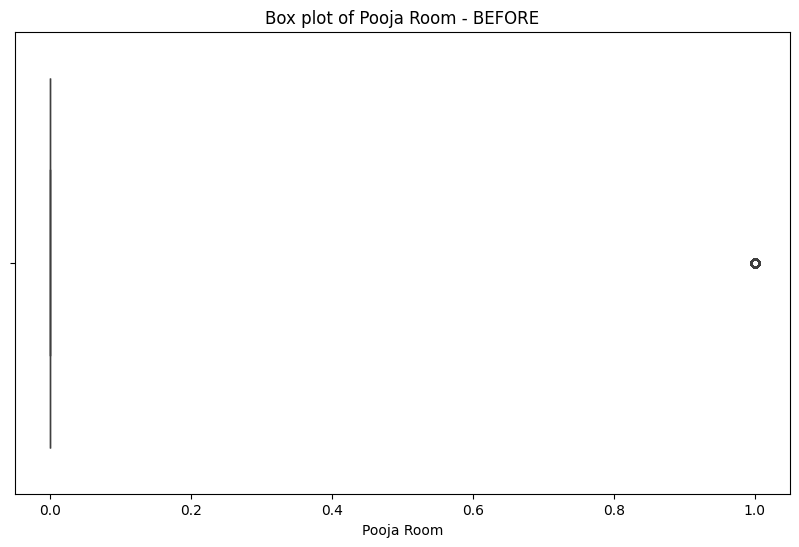

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pooja room')
plt.title("Box plot of Pooja Room - BEFORE")
plt.xlabel("Pooja Room")
plt.show()

In [ ]:
Q1 = dataset['pooja room'].quantile(0.25)
Q3 = dataset['pooja room'].quantile(0.75)
IQR = Q3 - Q1
outlier_indices = (dataset['pooja room'] < (Q1 - 1.5 * IQR)) | (dataset['pooja room'] > (Q3 + 1.5 * IQR))

IQR
#dataset['pooja room'] = np.where(outlier_indices, dataset['pooja room'].median(), dataset['pooja room'])

0.0

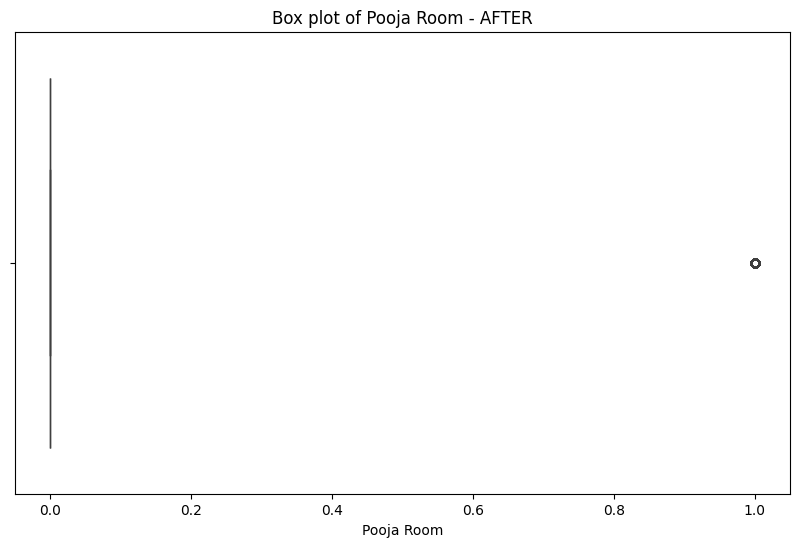

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='pooja room')
plt.title("Box plot of Pooja Room - AFTER")
plt.xlabel("Pooja Room")
plt.show()

## observation:
1. MOST OF THEM HAVE NO POOJA ROOMS
2. NO MISSING VALUES
3. NUMERICAL FEATURE
4. 494 outliers

# **20. STORE ROOM**

## Exploration

In [ ]:
dataset['store room'].describe()
dataset['store room'].value_counts()

store room
0    2893
1     248
Name: count, dtype: int64

## bar plot

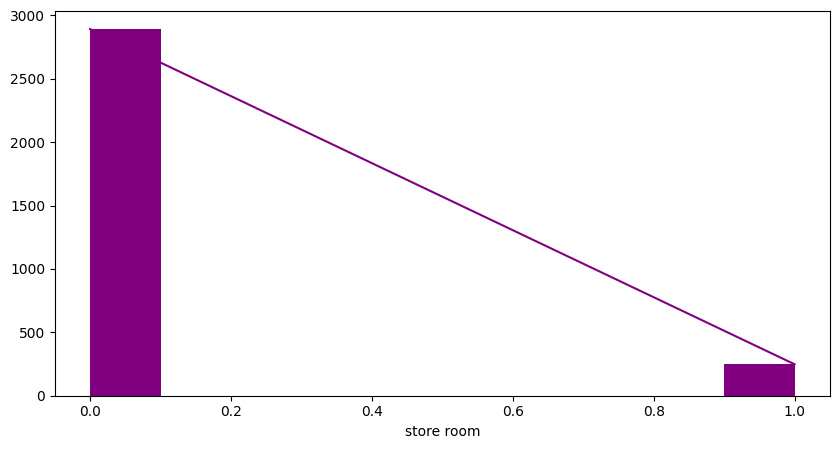

In [ ]:
plt.figure(figsize=(10, 5))
dataset['store room'].hist(color='purple')
dataset['store room'].value_counts().plot(color='purple')
plt.show()

## pie chart

<Axes: ylabel='count'>

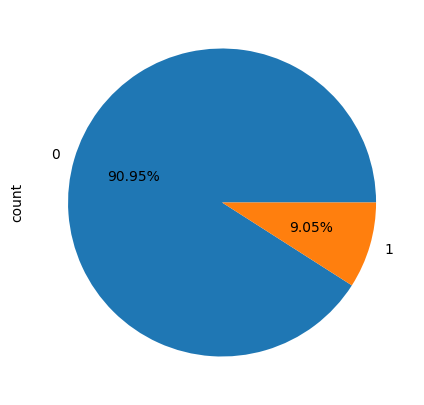

In [ ]:
plt.figure(figsize = (10,5))
df['store room'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## store room vs price (graph)

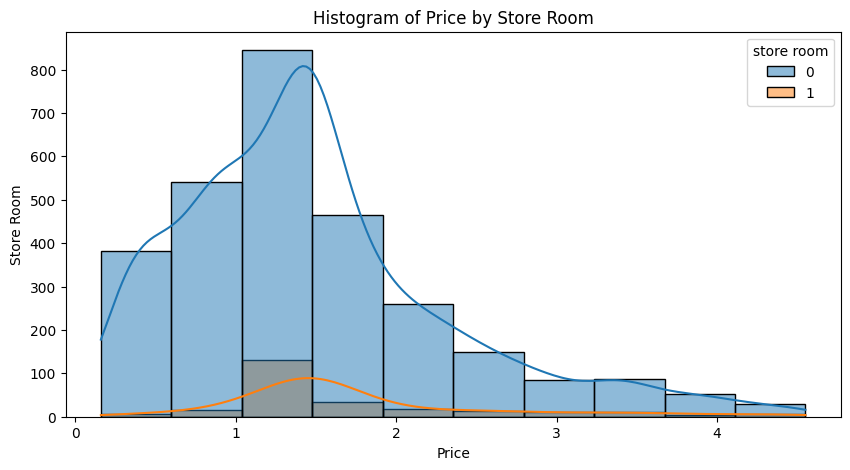

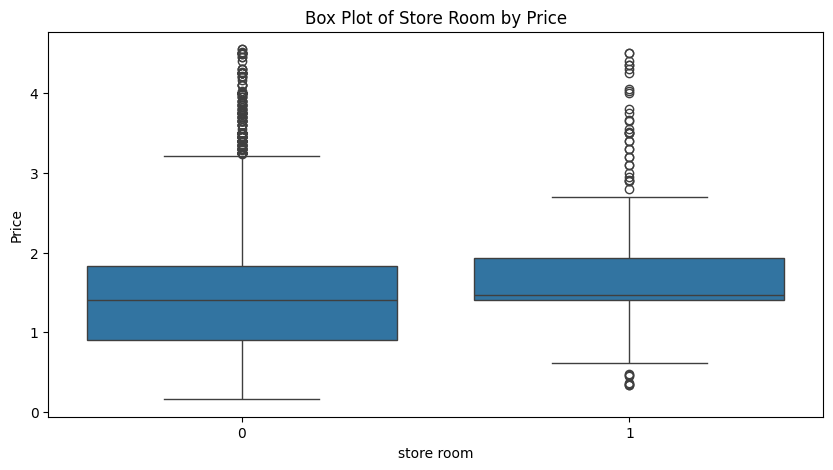

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='store room',kde=True, bins=10)
plt.title('Histogram of Price by Store Room')
plt.xlabel('Price')
plt.ylabel('Store Room')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='store room', y='price')
plt.title('Box Plot of Store Room by Price')
plt.xlabel('store room')
plt.ylabel('Price')
plt.show()

## missing values

In [ ]:
missing_store_room= dataset["store room"].isnull().sum()
missing_store_room

0

## outlier detection

In [ ]:
q1 = dataset['store room'].quantile(0.25) # 25th percentile
q3 = dataset['store room'].quantile(0.75) #75th percentile
IQR_store_room = q3-q1 #interquartile range
k = IQR_store_room*1.5
outliers_store_room = dataset[(dataset['store room']< q1-k )| (dataset['store room']>q3+k)]
print("No. of outliers:",len(outliers_store_room))
print("IQR:",IQR_store_room)

No. of outliers: 248
IQR: 0.0


## outliers handling

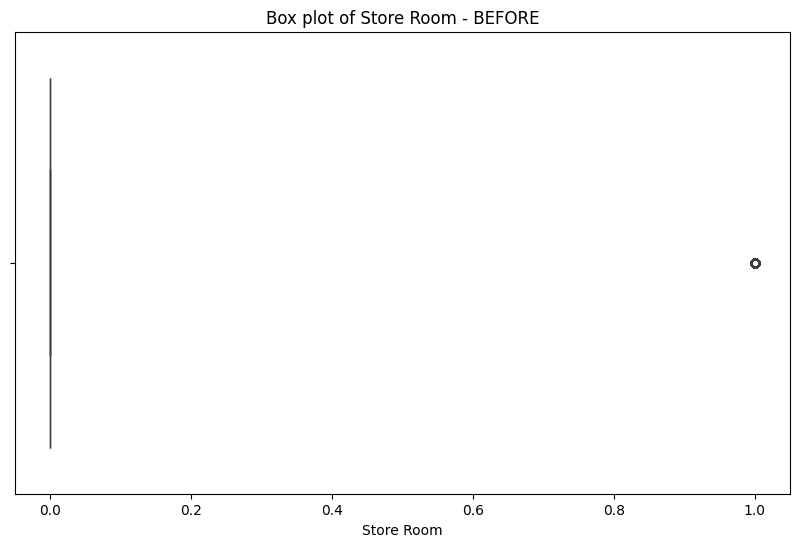

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store room')
plt.title("Box plot of Store Room - BEFORE")
plt.xlabel("Store Room")
plt.show()

## observation:
1. HAS 103 OUTLIERS
2. NUMERICAL FEATURE

# **21. OTHERS**

## exploration

In [ ]:
dataset['others'].value_counts()

others
0    2808
1     333
Name: count, dtype: int64

## bar plot

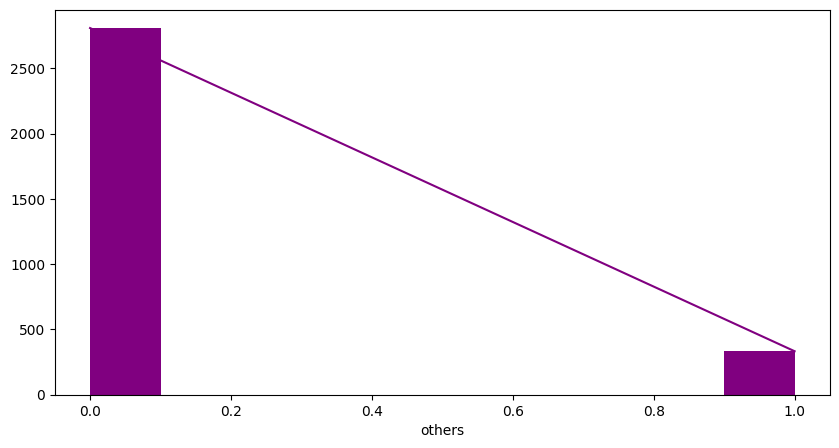

In [ ]:
plt.figure(figsize=(10, 5))
dataset['others'].hist(color='purple')
dataset['others'].value_counts().plot(color='purple')
plt.show()

## pie chart

<Axes: ylabel='count'>

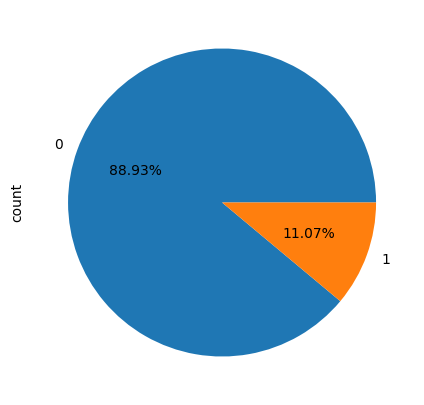

In [ ]:
plt.figure(figsize = (10,5))
df['others'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

## others vs price graph

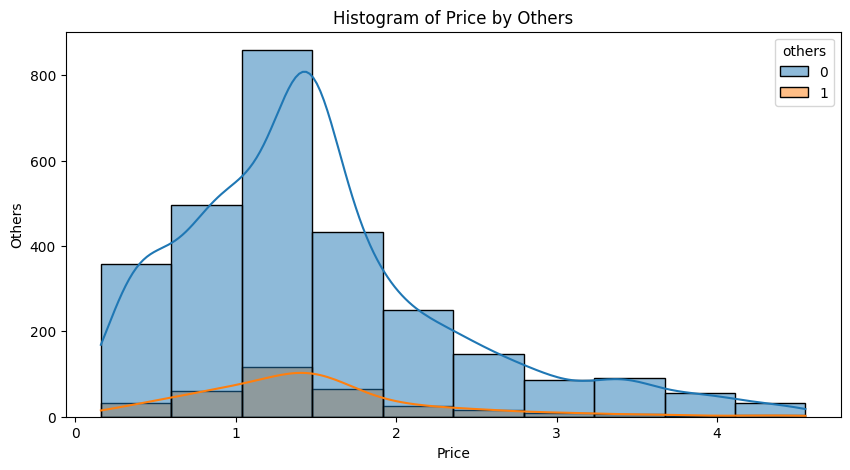

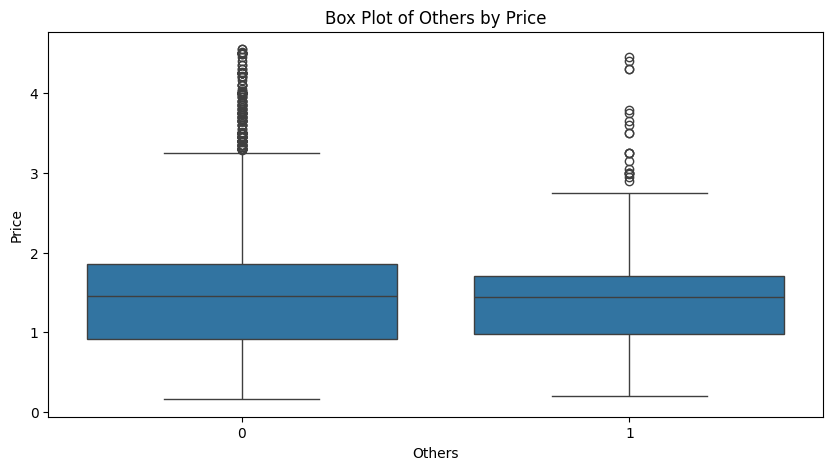

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='others', kde=True, bins=10)
plt.title('Histogram of Price by Others')
plt.xlabel('Price')
plt.ylabel('Others')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='others', y='price')
plt.title('Box Plot of Others by Price')
plt.xlabel('Others')
plt.ylabel('Price')
plt.show()

## missing values

In [ ]:
missing_others= dataset["others"].isnull().sum()
missing_others

0

## outlier detection

In [ ]:
q1 = dataset['others'].quantile(0.25) # 25th percentile
q3 = dataset['others'].quantile(0.75) #75th percentile
IQR_others = q3-q1 #interquartile range
k = IQR_others*1.5
outliers_others= dataset[(dataset['others']< q1-k )| (dataset['others']>q3+k)]
print("No. of outliers:",len(outliers_others))
print("IQR:",IQR_others)

No. of outliers: 333
IQR: 0.0


## outlier handling

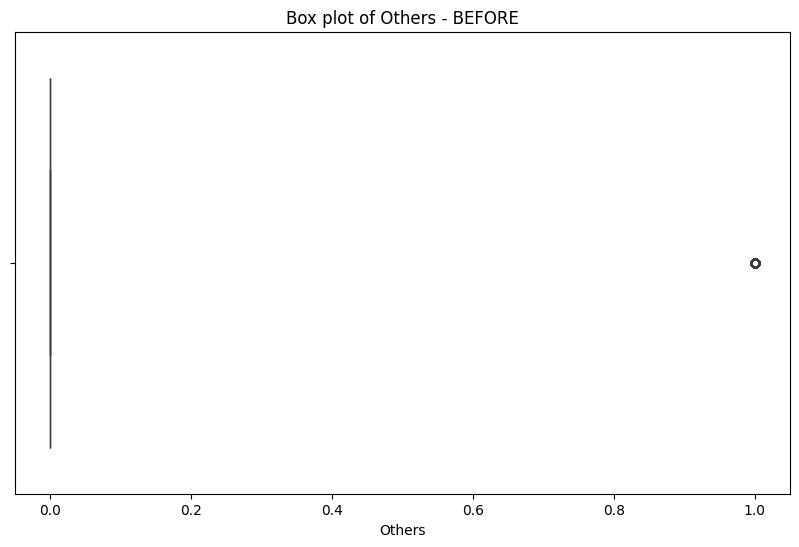

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='others')
plt.title("Box plot of Others - BEFORE")
plt.xlabel("Others")
plt.show()

## observation:
1. HAS 385 OUTLIERS
2. NUMERICAL FEATURE
3. NO MISSING VALUES

# **ROOMS PIE CHART**

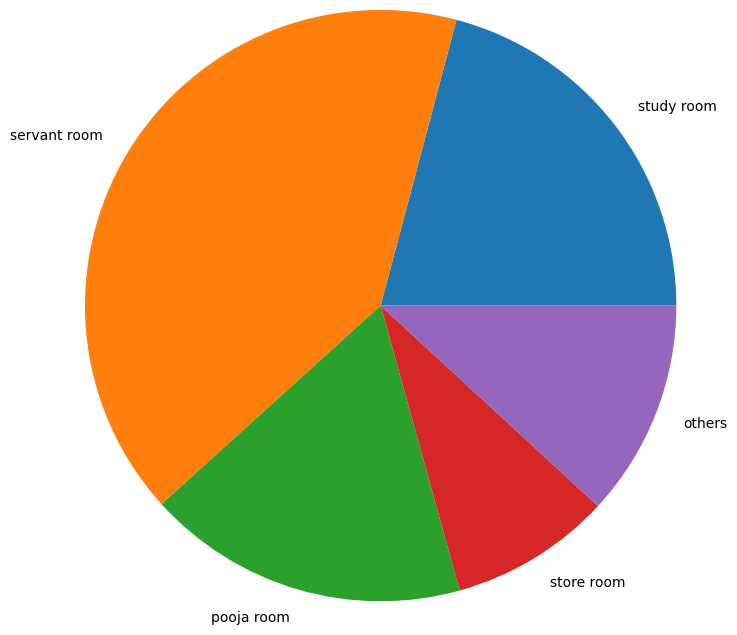

In [ ]:
data = [dataset["study room"].value_counts().get(1, 0), dataset["servant room"].value_counts().get(1, 0), dataset["pooja room"].value_counts().get(1, 0), dataset["store room"].value_counts().get(1, 0), dataset["others"].value_counts().get(1, 0)]
plt.pie(data,labels=["study room", "servant room", "pooja room", "store room", "others"],radius=2)
plt.gcf().patch.set_facecolor('white')

# **22. FURNISHING TYPE**

## Exploration

In [ ]:
dataset['furnishing_type'].value_counts()
dataset['furnishing_type'].describe()

count    3141.000000
mean        0.389366
std         0.586147
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: furnishing_type, dtype: float64

## bar plot

<Axes: xlabel='furnishing_type'>

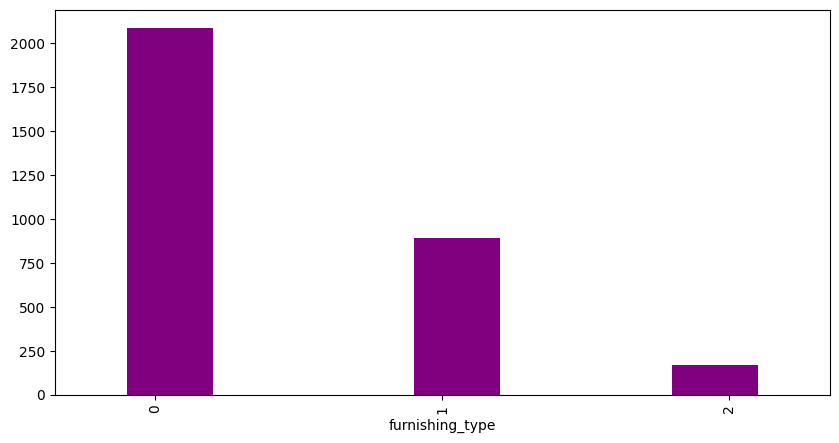

In [ ]:
plt.figure(figsize=(10, 5))
dataset['furnishing_type'].hist(color='purple')
dataset['furnishing_type'].value_counts().plot(kind='bar',color='purple',width=0.2)

<Axes: xlabel='furnishing_type'>

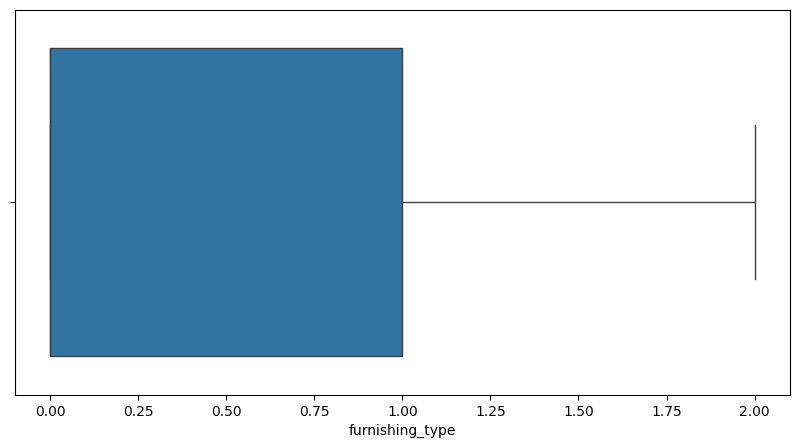

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='furnishing_type')

## furnishing type vs price graph

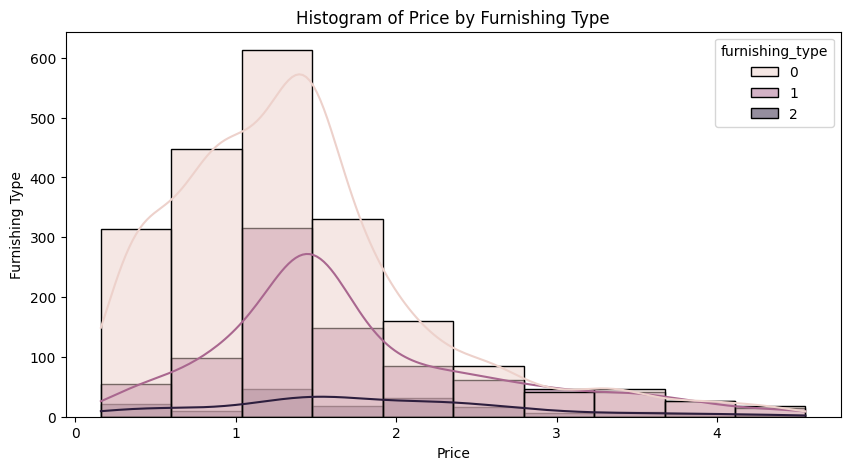

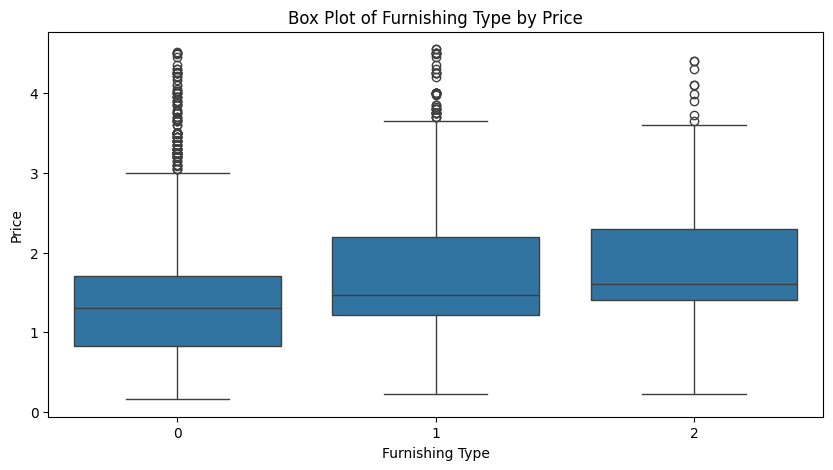

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='furnishing_type', kde=True, bins=10)
plt.title('Histogram of Price by Furnishing Type')
plt.xlabel('Price')
plt.ylabel('Furnishing Type')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='furnishing_type', y='price')
plt.title('Box Plot of Furnishing Type by Price')
plt.xlabel('Furnishing Type')
plt.ylabel('Price')
plt.show()

##Missing values

In [ ]:
missing_furnishingtype= dataset["furnishing_type"].isnull().sum()
missing_furnishingtype

0

## outlier detection

In [ ]:
q1 = dataset['furnishing_type'].quantile(0.25) # 25th percentile
q3 = dataset['furnishing_type'].quantile(0.75) #75th percentile
IQR_furnishing_type = q3-q1 #interquartile range
k = IQR_furnishing_type*1.5
outliers_furnishing_type= dataset[(dataset['furnishing_type']< q1-k )| (dataset['furnishing_type']>q3+k)]
print("No. of outliers:",len(outliers_furnishing_type))
print("IQR:",IQR_furnishing_type)

No. of outliers: 0
IQR: 1.0


## observation:
1. NO OUTLIERS
2. NUMERICAL FEATURE

# **23. LUXURY SCORE**

## exploration

In [ ]:
dataset['luxury_score'].value_counts()
dataset['luxury_score'].describe()

count    3141.000000
mean       77.700414
std        52.463585
min         0.000000
25%        42.000000
50%        66.000000
75%       117.000000
max       174.000000
Name: luxury_score, dtype: float64

In [ ]:
dataset['luxury_score'].skew()

0.36736586378284275

In [ ]:

dataset['luxury_score'].kurtosis()

-0.9571164406819981

## binning

In [ ]:
luxury_score_bins = pd.qcut(dataset['luxury_score'].value_counts(), 3, labels=['high_lux','medium_lux','low_lux'],duplicates='drop')
dataset['luxury_score_bin'] = dataset['luxury_score'].map(luxury_score_bins)
dataset['luxury_score_bin'].value_counts()

luxury_score_bin
low_lux       2129
medium_lux     702
high_lux       310
Name: count, dtype: int64

## bar plot

<Axes: xlabel='luxury_score_bin'>

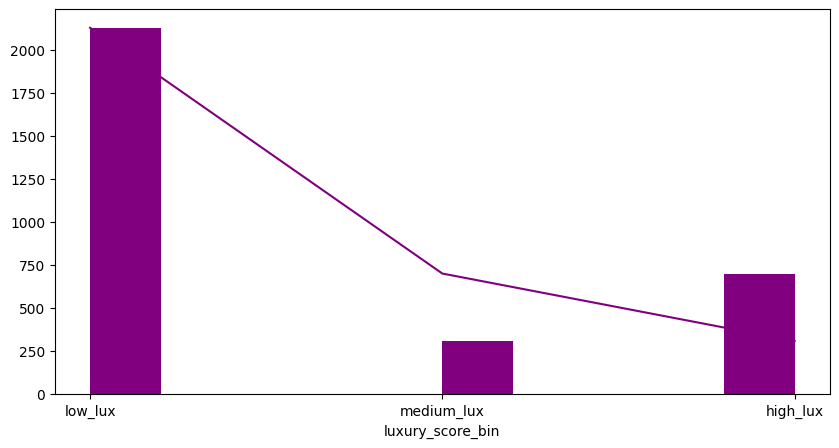

In [ ]:
plt.figure(figsize=(10, 5))
dataset['luxury_score_bin'].hist(color='purple')
dataset['luxury_score_bin'].value_counts().plot(color='purple')

## box plot

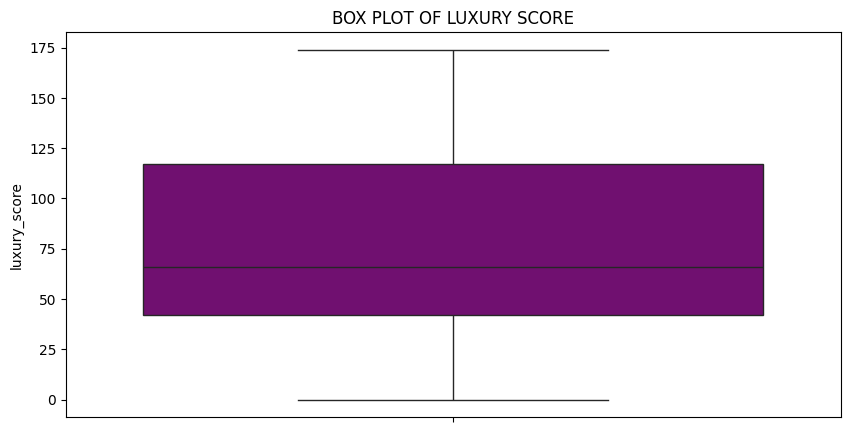

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset['luxury_score'],color='purple')
plt.title('BOX PLOT OF LUXURY SCORE')
plt.show()

## luxury score vs price

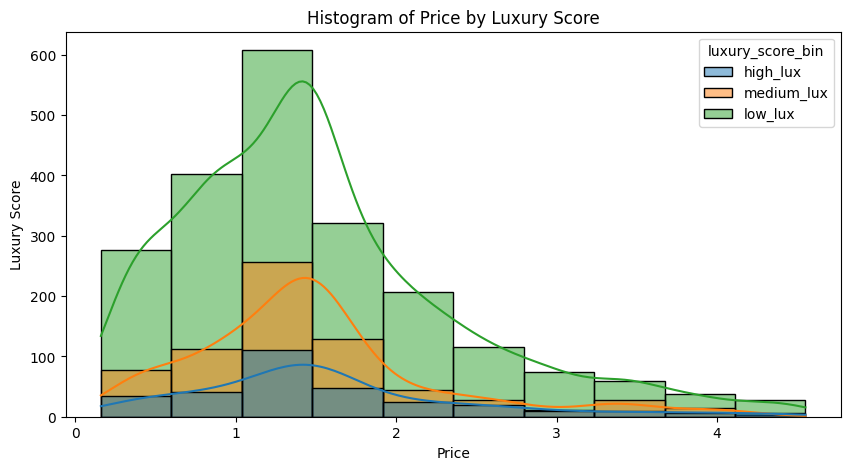

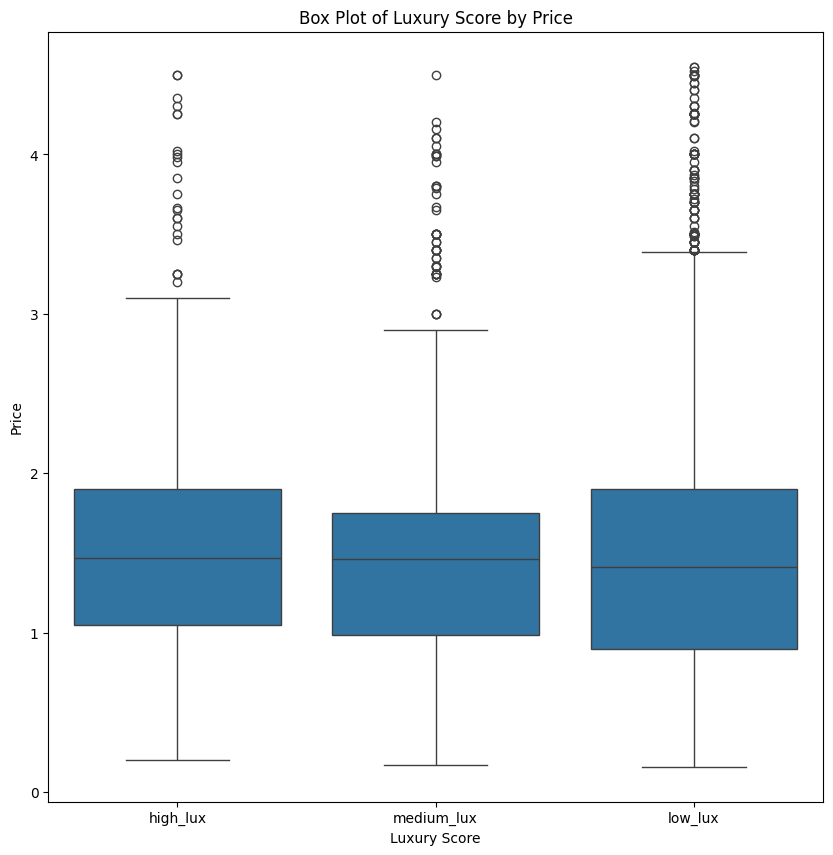

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x='price', hue='luxury_score_bin', kde=True, bins=10)
plt.title('Histogram of Price by Luxury Score')
plt.xlabel('Price')
plt.ylabel('Luxury Score')
plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(data=dataset, x='luxury_score_bin', y='price')
plt.title('Box Plot of Luxury Score by Price')
plt.xlabel('Luxury Score')
plt.ylabel('Price')
plt.show()

## missing values

In [ ]:
missing_luxury_score= dataset["luxury_score"].isnull().sum()
missing_luxury_score

0

## outlier detection

In [ ]:
q1 = dataset['luxury_score'].quantile(0.25) # 25th percentile
q3 = dataset['luxury_score'].quantile(0.75) #75th percentile
IQR_luxury_score = q3-q1 #interquartile range
k = IQR_luxury_score*1.5
outliers_luxury_score= dataset[(dataset['luxury_score']< q1-k )| (dataset['luxury_score']>q3+k)]
print("No. of outliers:",len(outliers_luxury_score))
print("IQR:",IQR_luxury_score)

No. of outliers: 0
IQR: 75.0


## observation:
1. No outliers
2. No missing values

In [ ]:
dataset

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishing_type,luxury_score,society_bins,sector_bins,price_per_sqft_bin,area_bin,bedroom_bin,bathroom_bin,floorNum_bin,luxury_score_bin
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,0,8,high,medium,"(0, 10000]","(1000, 10000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,0,38,high,high,"(0, 10000]","(1000, 10000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux
2,flat,pyramid elite,sector 86,0.46,79.0,1740.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,0,15,medium,high,"(0, 10000]","(50000, 900000]","(0, 3]","(0, 3]",NaN,low_lux
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,0,49,high,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(10.0, 30.0]",low_lux
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,4,...,1,174,high,high,"(0, 10000]","(1000, 10000]","(0, 3]","(3, 6]","(0.0, 10.0]",low_lux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4,4,2,...,0,0,low,low,"(10000, 50000]","(50, 1000]","(3, 7]","(3, 6]","(0.0, 10.0]",low_lux
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,0,73,high,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(0.0, 10.0]",high_lux
3799,house,international city by sobha phase 1,sector 109,1.47,9634.0,1740.0,Plot area 692(578.6 sq.m.),5,5,4,...,0,160,high,high,"(0, 10000]","(1000, 10000]","(3, 7]","(3, 6]","(0.0, 10.0]",low_lux
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,1,67,low,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux


In [ ]:
dataset.isnull().sum()


property_type            0
society                  0
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                   0
agePossession            0
super_built_up_area      0
built_up_area            0
carpet_area              0
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             0
society_bins             1
sector_bins              0
price_per_sqft_bin      12
area_bin                14
bedroom_bin              0
bathroom_bin             0
floorNum_bin           135
luxury_score_bin         0
dtype: int64

# feature selection

In [ ]:
new_dataset=dataset.copy()
new_dataset=new_dataset.drop(columns=['society','areaWithType','facing','floorNum','area','super_built_up_area','carpet_area'])

In [ ]:
correlation = np.corrcoef(dataset['price'], dataset['price_per_sqft'])
correlation

array([[1.        , 0.56889866],
       [0.56889866, 1.        ]])

In [ ]:
new_dataset

,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,...,furnishing_type,luxury_score,society_bins,sector_bins,price_per_sqft_bin,area_bin,bedroom_bin,bathroom_bin,floorNum_bin,luxury_score_bin
0,flat,sector 36,0.82,7585.0,3,2,2,1,830.917910,0,...,0,8,high,medium,"(0, 10000]","(1000, 10000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux
1,flat,sector 89,0.95,8600.0,2,2,2,1,981.610054,1,...,0,38,high,high,"(0, 10000]","(1000, 10000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux
2,flat,sector 86,0.46,79.0,2,2,1,5,1423.913043,0,...,0,15,medium,high,"(0, 10000]","(50000, 900000]","(0, 3]","(0, 3]",NaN,low_lux
3,flat,sohna road,0.32,5470.0,2,2,1,1,1000.000000,0,...,0,49,high,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(10.0, 30.0]",low_lux
4,flat,sector 92,1.60,8020.0,3,4,4,3,1615.000000,0,...,1,174,high,high,"(0, 10000]","(1000, 10000]","(0, 3]","(3, 6]","(0.0, 10.0]",low_lux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,house,sector 6,0.75,15625.0,4,4,2,4,480.000000,0,...,0,0,low,low,"(10000, 50000]","(50, 1000]","(3, 7]","(3, 6]","(0.0, 10.0]",low_lux
3798,flat,sector 84,0.37,6346.0,2,2,1,3,448.126866,0,...,0,73,high,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(0.0, 10.0]",high_lux
3799,house,sector 109,1.47,9634.0,5,5,4,3,1423.913043,1,...,0,160,high,high,"(0, 10000]","(1000, 10000]","(3, 7]","(3, 6]","(0.0, 10.0]",low_lux
3800,flat,sector 2,0.60,8163.0,1,1,1,0,564.962687,0,...,1,67,low,high,"(0, 10000]","(50, 1000]","(0, 3]","(0, 3]","(0.0, 10.0]",low_lux


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
columns = new_dataset.select_dtypes(exclude=['number'])
label_encoder = LabelEncoder()
for column in columns:
  label_encoder.fit(new_dataset[column])
  new_dataset[column] = label_encoder.transform(new_dataset[column])

label_encoder.fit(new_dataset['property_type'])
new_dataset['property_type'] = label_encoder.transform(new_dataset['property_type'])


In [ ]:
new_dataset

,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,...,furnishing_type,luxury_score,society_bins,sector_bins,price_per_sqft_bin,area_bin,bedroom_bin,bathroom_bin,floorNum_bin,luxury_score_bin
0,0,34,0.82,7585.0,3,2,2,1,830.917910,0,...,0,8,0,2,0,1,0,0,0,1
1,0,92,0.95,8600.0,2,2,2,1,981.610054,1,...,0,38,0,0,0,1,0,0,0,1
2,0,89,0.46,79.0,2,2,1,5,1423.913043,0,...,0,15,2,0,0,3,0,0,2,1
3,0,100,0.32,5470.0,2,2,1,1,1000.000000,0,...,0,49,0,0,0,0,0,0,1,1
4,0,96,1.60,8020.0,3,4,4,3,1615.000000,0,...,1,174,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,1,59,0.75,15625.0,4,4,2,4,480.000000,0,...,0,0,1,1,1,0,1,1,0,1
3798,0,87,0.37,6346.0,2,2,1,3,448.126866,0,...,0,73,0,0,0,0,0,0,0,0
3799,1,12,1.47,9634.0,5,5,4,3,1423.913043,1,...,0,160,0,0,0,1,1,1,0,1
3800,0,22,0.60,8163.0,1,1,1,0,564.962687,0,...,1,67,1,0,0,0,0,0,0,1


In [ ]:
x = new_dataset.drop('price',axis=1)
y = new_dataset['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

features = new_dataset.columns.difference(['price'])

model = RandomForestRegressor()
model.fit(new_dataset[features], new_dataset['price'])

important_features = model.feature_importances_
importance = pd.DataFrame({'Feature': features, 'Importance': important_features})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

               Feature  Importance
14      price_per_sqft    0.310497
3             bathroom    0.251674
7        built_up_area    0.220084
1             area_bin    0.044773
15  price_per_sqft_bin    0.040064
17              sector    0.030373
10        luxury_score    0.016430
5              bedRoom    0.013551
0        agePossession    0.007829
18         sector_bins    0.007813
2              balcony    0.006768
16       property_type    0.006136
4         bathroom_bin    0.005898
6          bedroom_bin    0.005469
19        servant room    0.005301
20        society_bins    0.005027
9      furnishing_type    0.004434
11    luxury_score_bin    0.004211
12              others    0.003923
8         floorNum_bin    0.002928
22          study room    0.002838
13          pooja room    0.002041
21          store room    0.001937


# linear regression model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse


0.23323517723519357

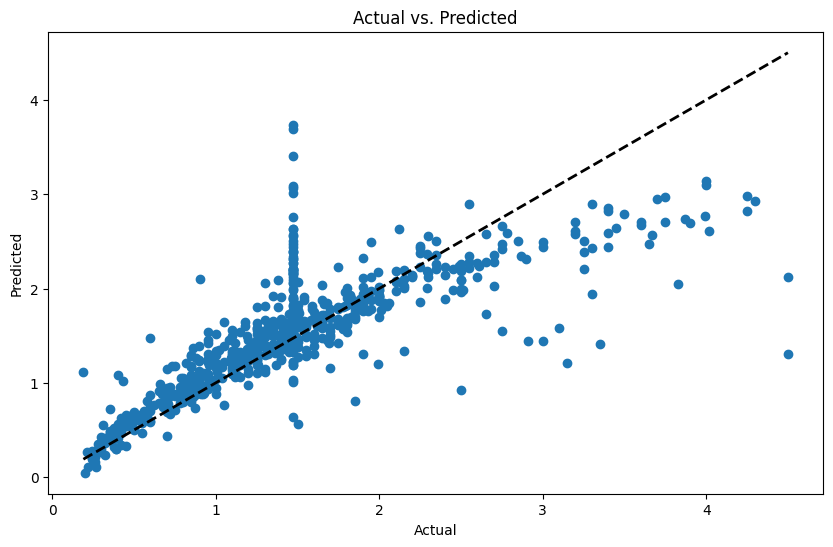

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()